In [12]:
import glob
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
from keras.models import load_model 

from Indicator import Indicator
from GA import GA

def norm(df,col_name):# this will get columnname + _n
    #Normalize data each colunm in to range -1 to 1
    df[col_name+'_n'] = 2*(df[col_name]-df[col_name].min())/(df[col_name].max()-df[col_name].min())-1    
    return df

def add_shift_day(data,day):
    r_list = []
    for i in range(day,len(data)):#Number mean day to shift
        r_list.append(data[i-day : i])
    return np.array(r_list)

def BuyCutloss(df,cutloss):
    #buying Cut loss 5 
    cutloss = (100-cutloss)/100
    buying = False
    buy,sell = [],[]
    buypoint,sellpoint = [],[]
    BP=0
    pf = 0
    for index,row in df.iterrows():
        if row['y_pred'] == 0 and buying == False:
            buypoint.append(row['Close'])

            BP = row['Close']
            buying = True
        if row['y_pred'] == 1 and buying == True:
            sellpoint.append(row['Close'])
            buying = False
        if row['Close'] < BP*cutloss and buying == True:
            sellpoint.append(row['Close'])
            buying = False

    if df['y_pred'].iloc[-1] == 0 and buying==True:#Add last Close Prize
        sellpoint.append(df['Close'].iloc[-1])

    for i in range(len(buypoint)):#Cal Profit
        pf += (sellpoint[i]-buypoint[i])/buypoint[i]
    print(pf*money)
    return pf*money

def PredictThreshold(y):
    pred = []
    last = np.argmax(y[0],-1)
    for c in y:

        if c[0]>0.8:
            pred.append(0)
            last = 0
        elif c[1]>0.8:
            pred.append(1)
            last = 1
        else:
            pred.append(last)
    return pred

def PredictTresholdnoise(y):
    pred=[]
    last = np.argmax(y[0],-1)
    countup,countdown = 0,0
    for c in y:
        if c[0]>0.8 and last == 1:
            countup+=1
            countdown = 0
        elif c[1]>0.8 and last == 0:
            countdown+=1
            countup =0
            
        if countup >3:
            last = 0
        elif countdown>3:
            last = 1
        pred.append(last)
    return pred

# Load Model

In [13]:
model = load_model('model_LSTM.h5')

# Stock name and Year to Simulation

In [14]:
stocklist =[['MMM',2016,2018],['AAPL',2016,2018],['AXP',2016,2018,],['CSCO',2016,2018],
    ['DD',2016,2018],['V',2016,2018],['JNJ',2016,2018],['JPM',2016,2018],['GE',2015,2017],
    ['MSFT',2017,2019],['KO',2015,2017],['BA',2015,2017],['BANPU.bk',2017,2019],['JNJ',2018,2020],
    ['KKP.bk',2018,2020],['SCB.bk',2017,2019],['DIS',2016,2018],['IBM',2016,2018],['PG',2016,2018],
    ['PEP',2017,2019],['JTS.bk',2017,2019],['GPS',2015,2017],['SWN',2015,2017],['thai.bk',2017,2019],
    ['GME',2018,2020], ['JAS.bk',2017,2019], ['MAC',2017,2019],['TAP',2017,2019],
    ['OXY',2018,2020],['SBUX',2007,2009]]

# Simulation

C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


502 502


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


487 487


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


489 489


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


487 487


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


502 502


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


487 487


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


487 487


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


487 487


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


502 502


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


502 502


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


503 503


C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\Lenovo\anaconda3\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


504 504


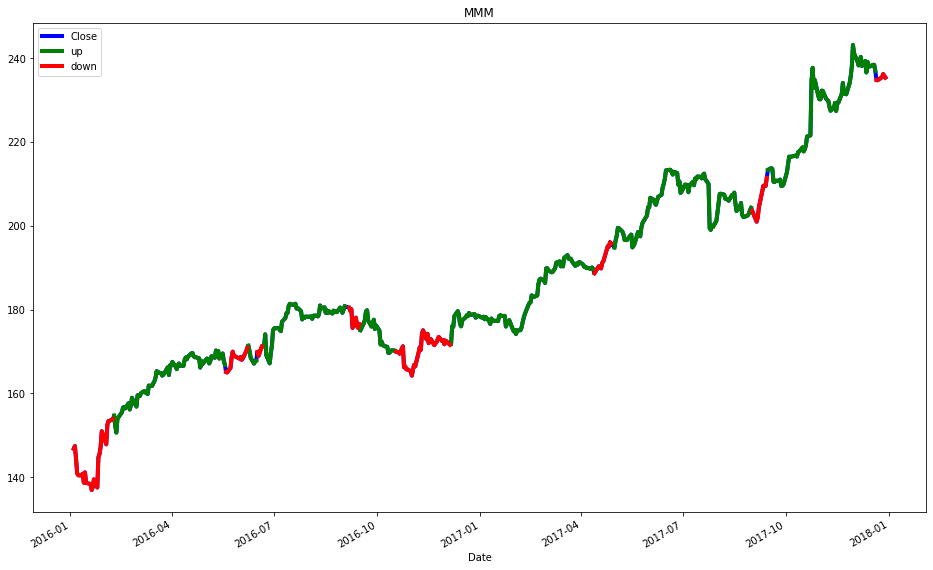

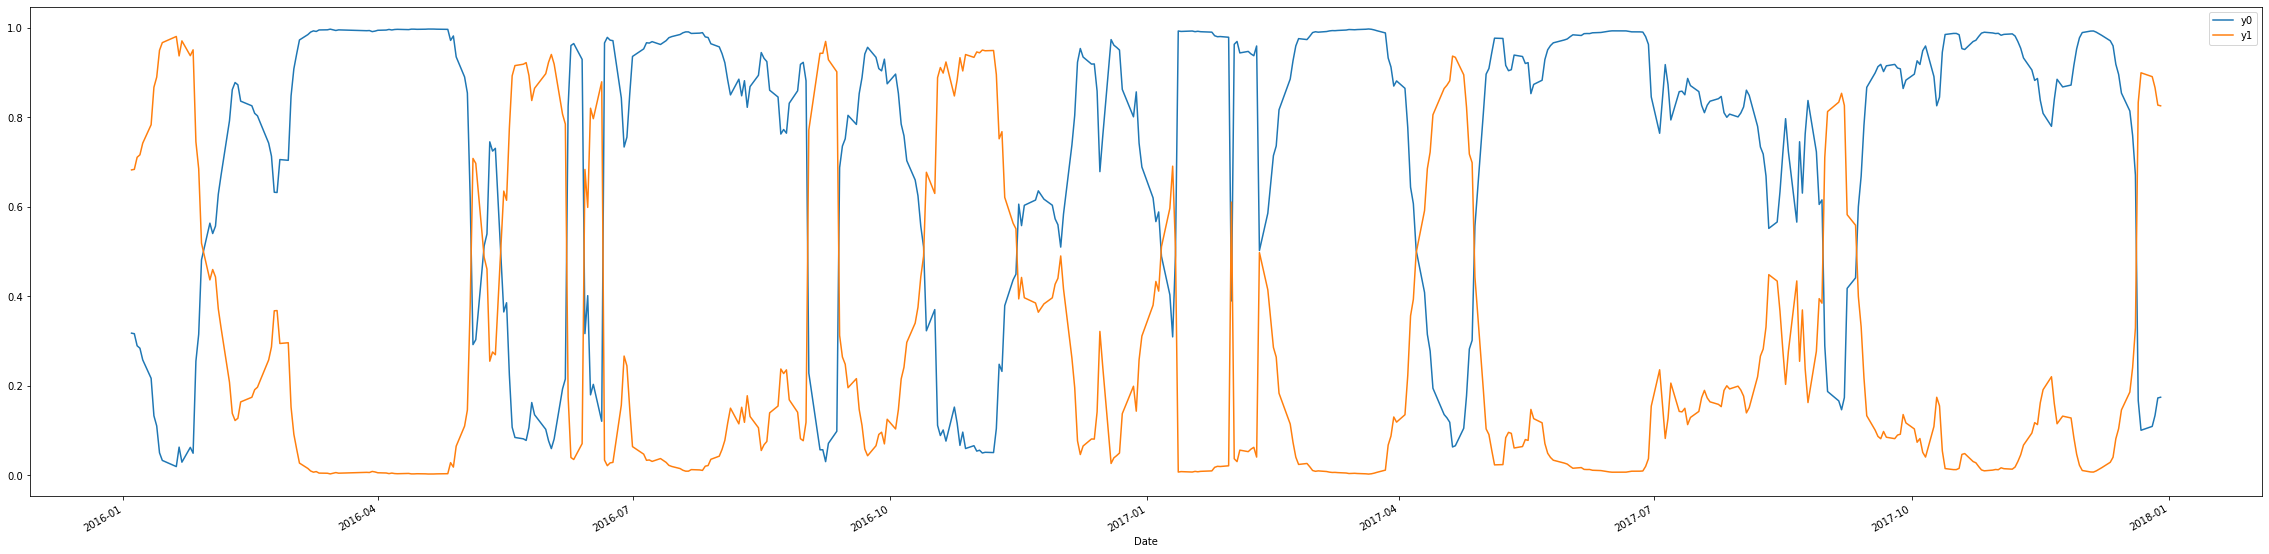

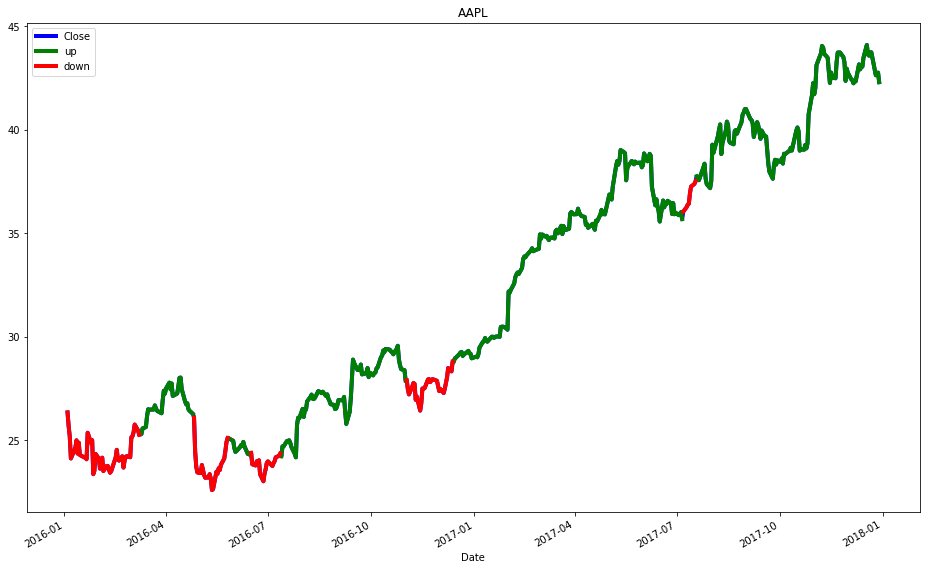

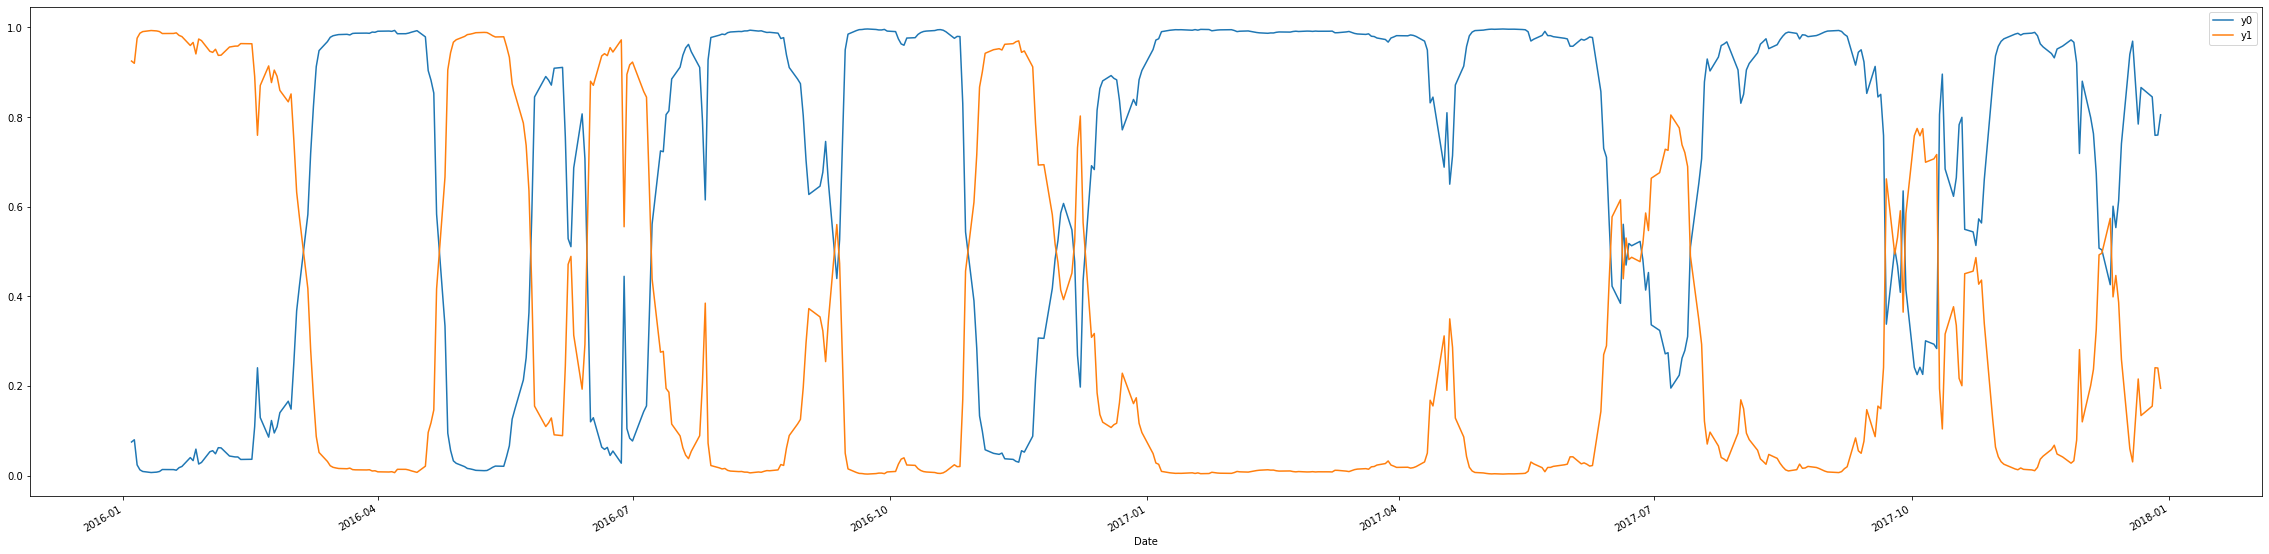

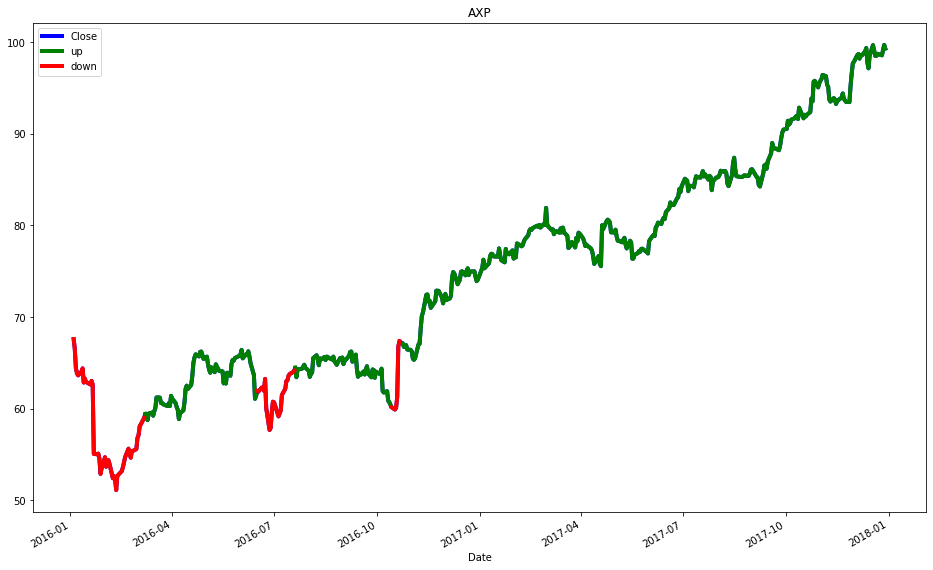

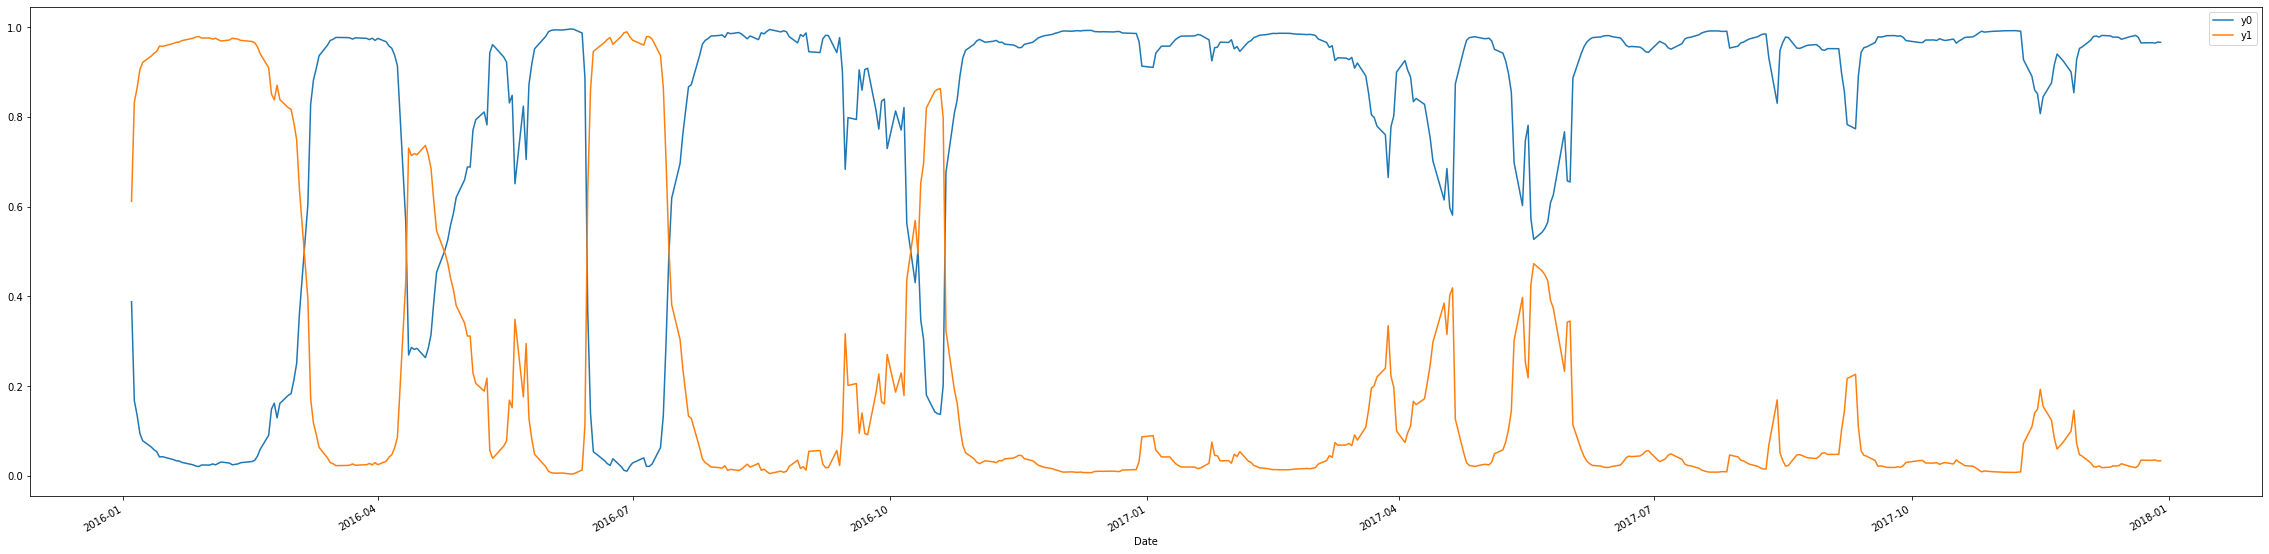

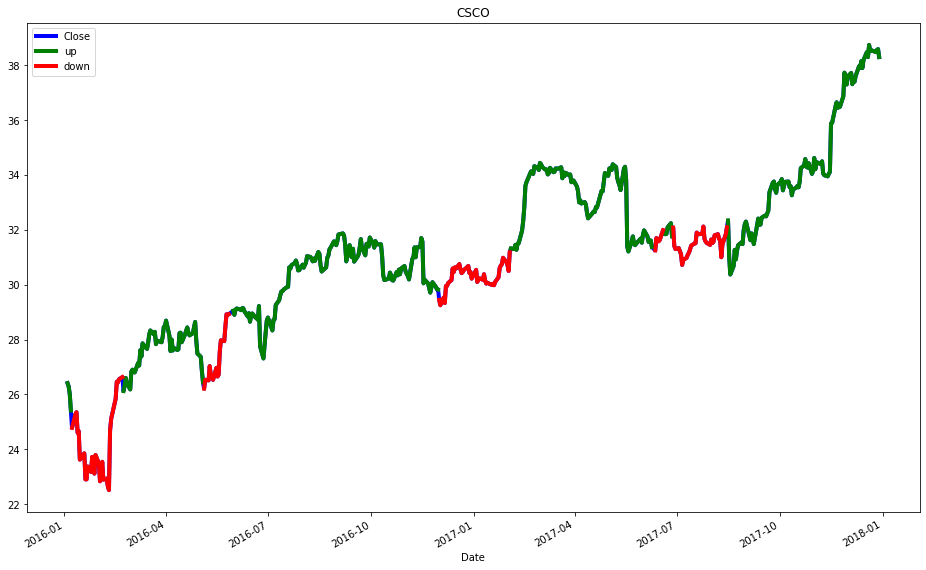

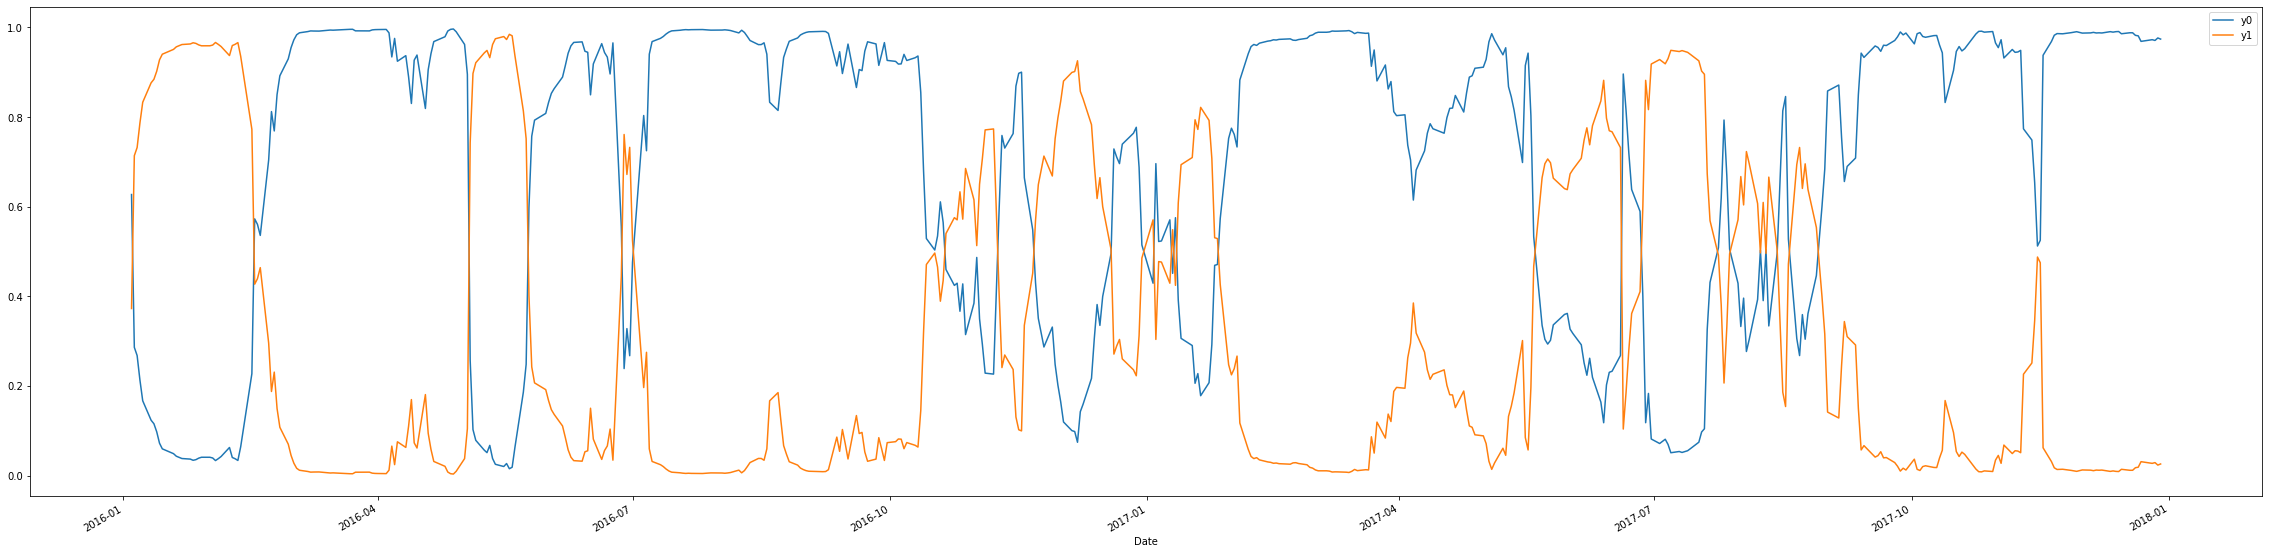

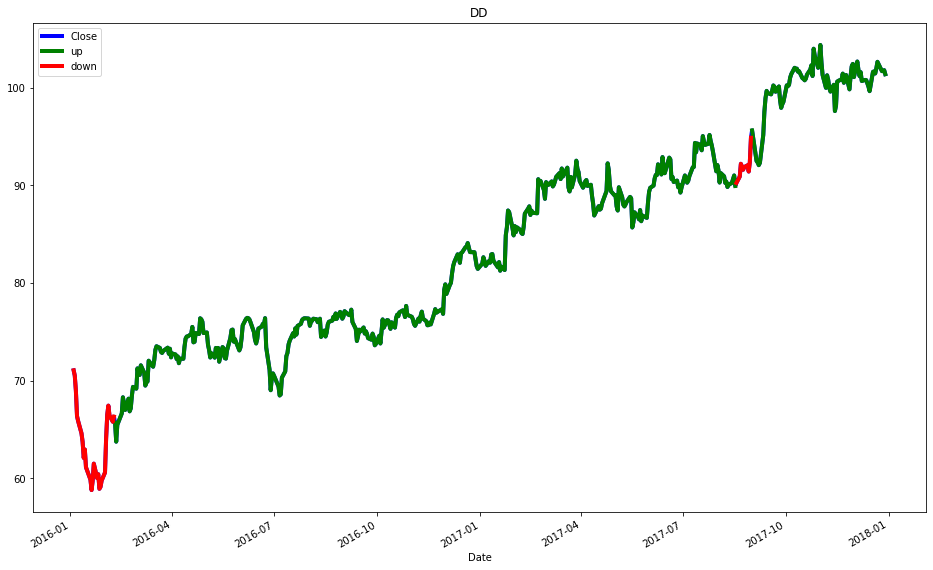

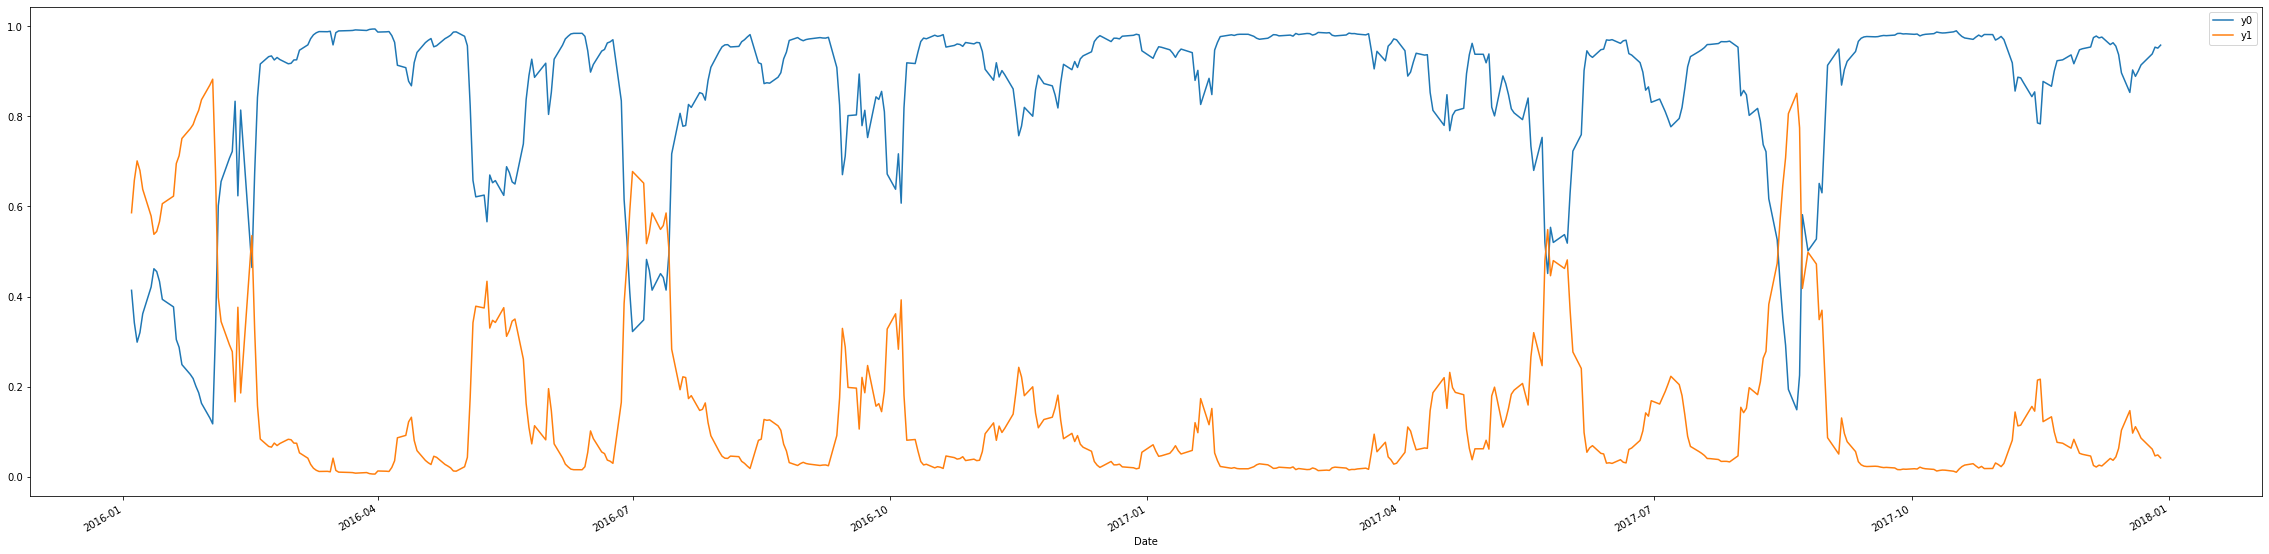

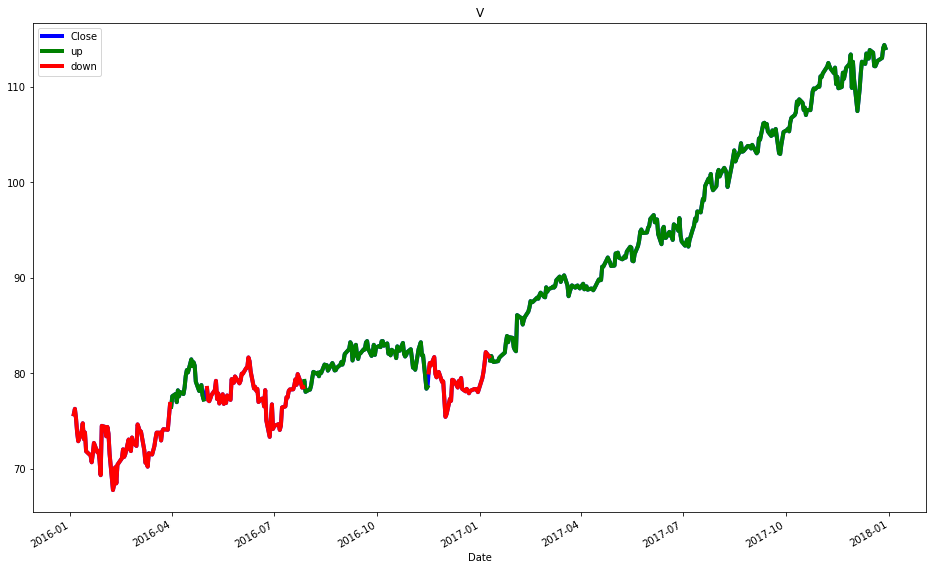

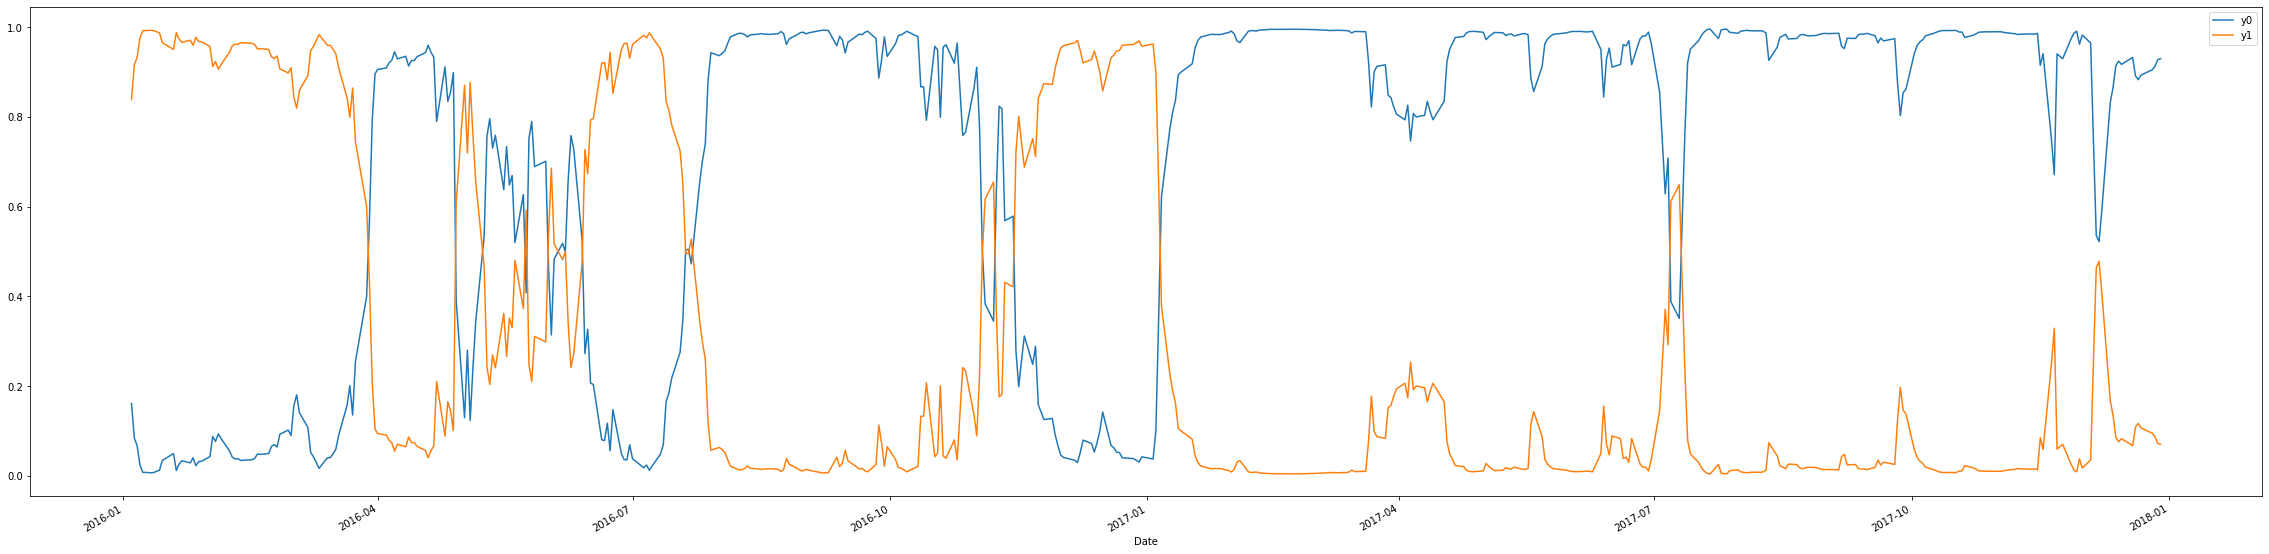

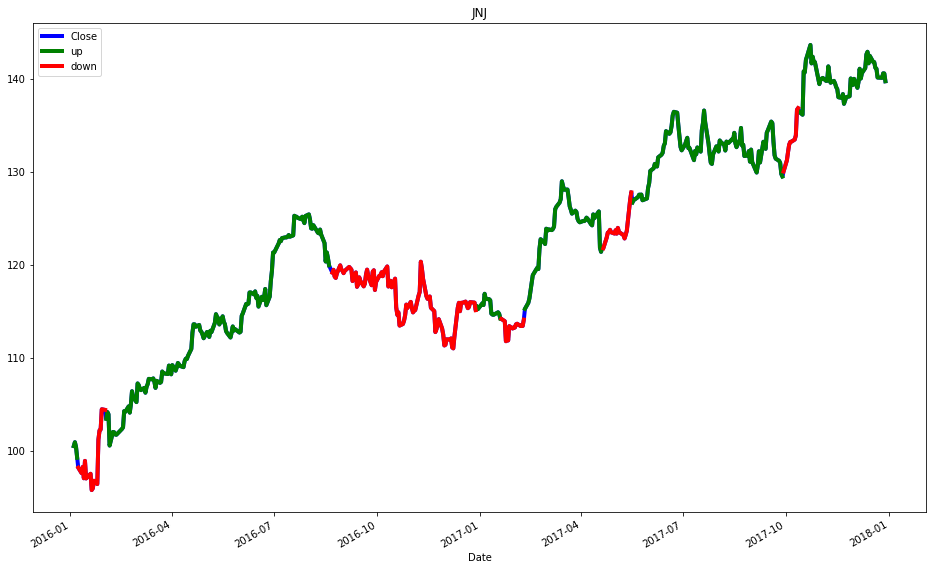

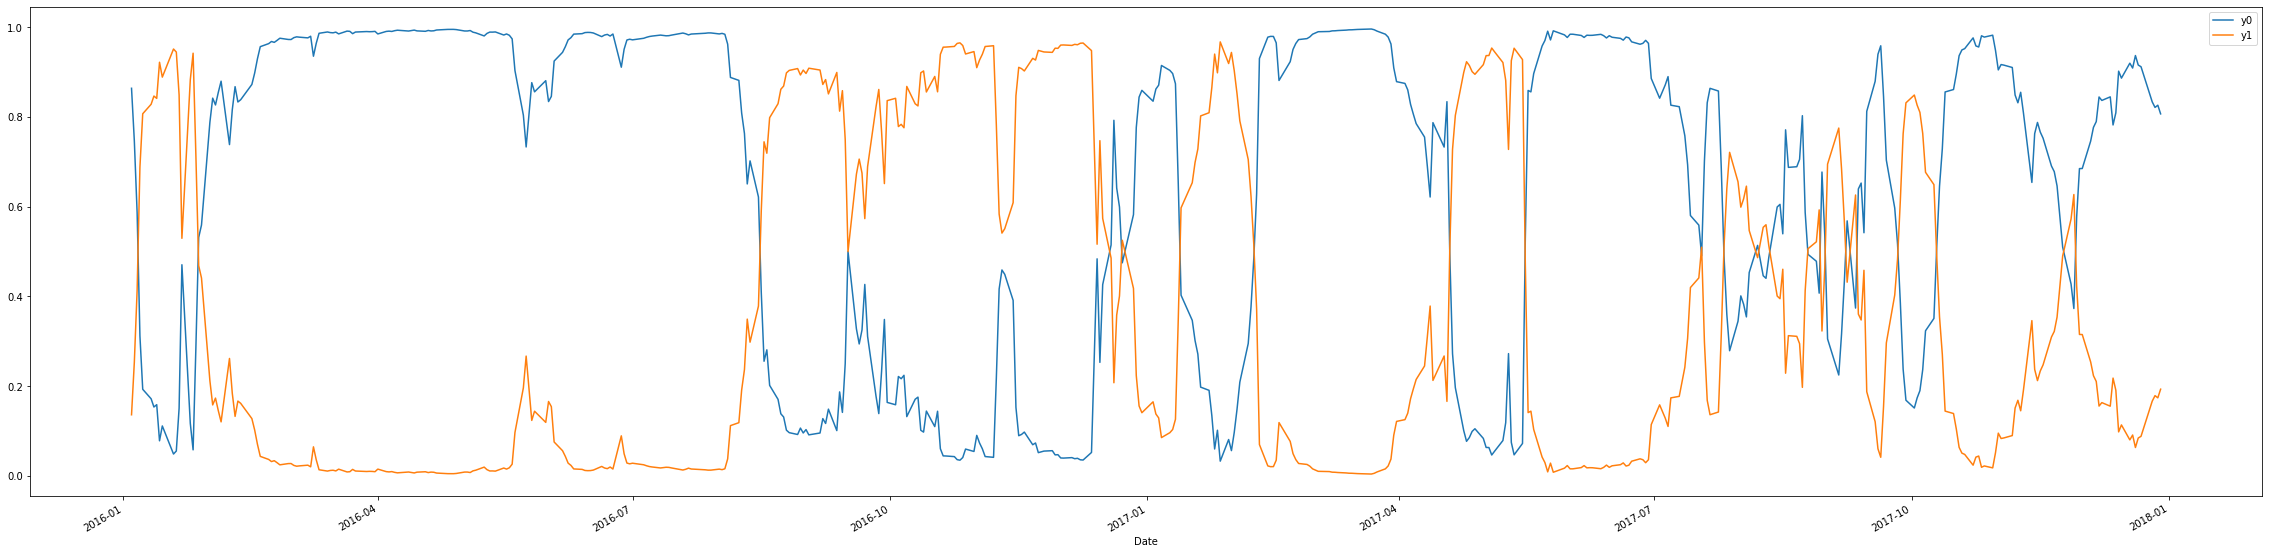

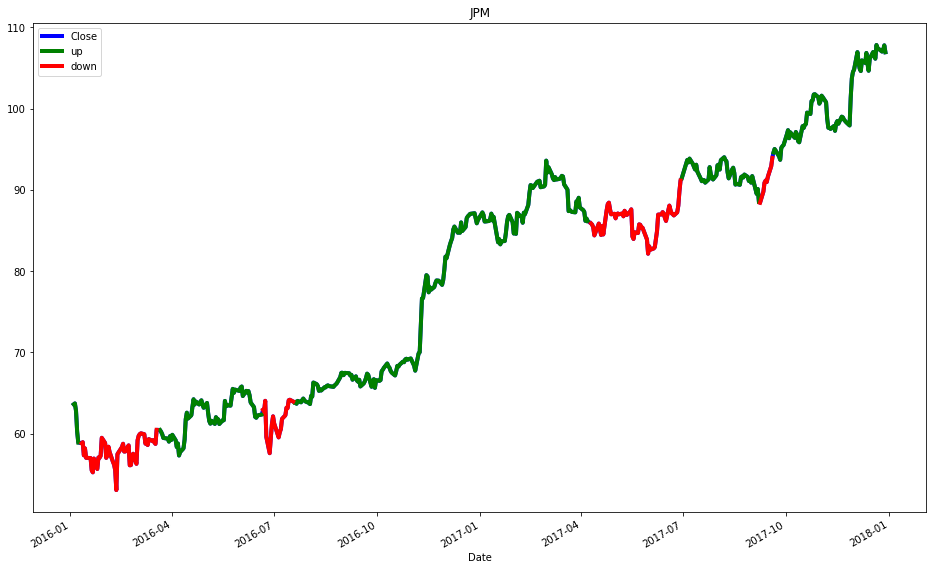

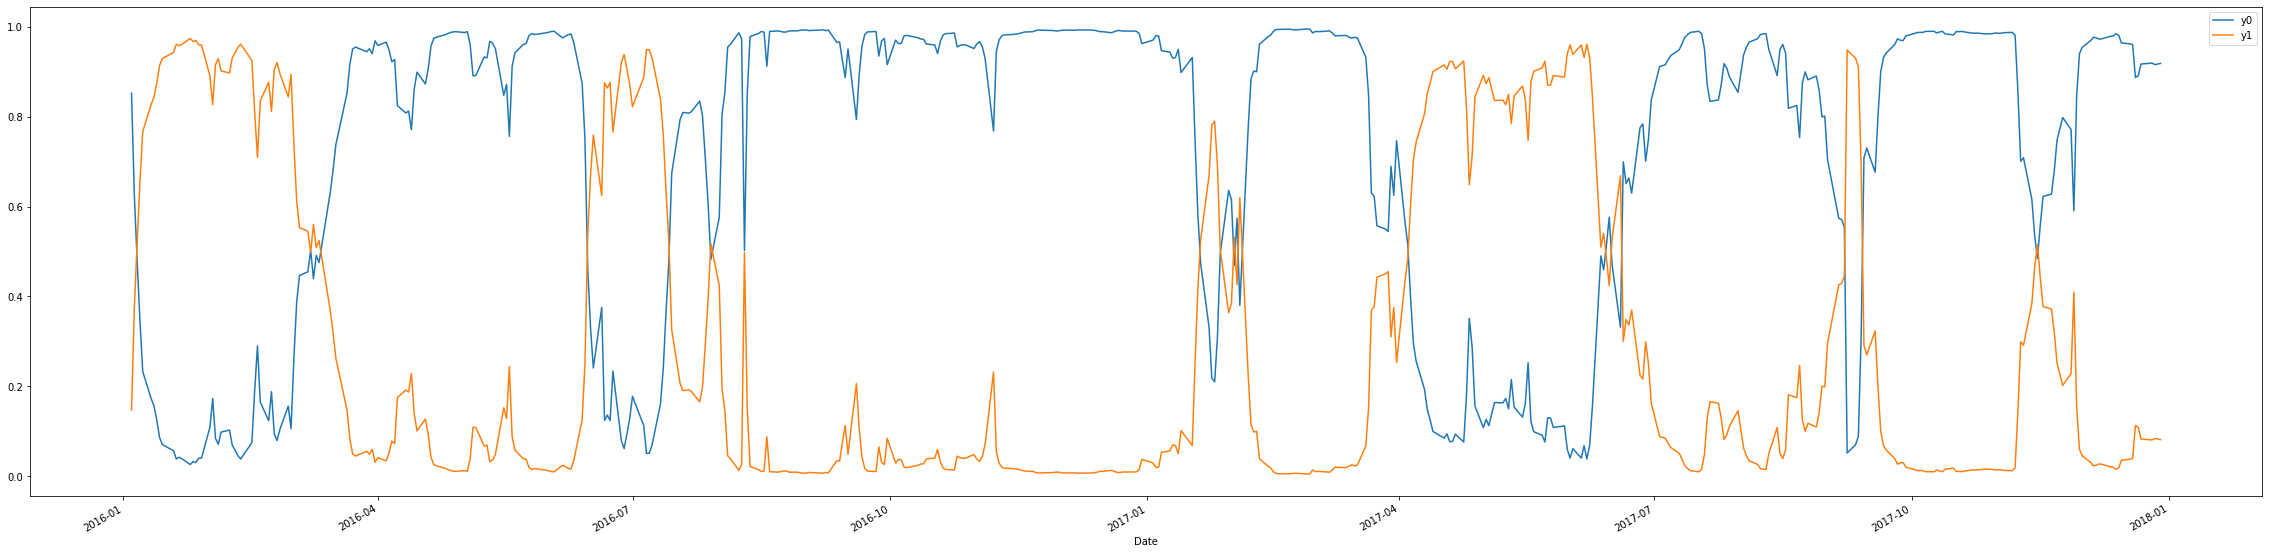

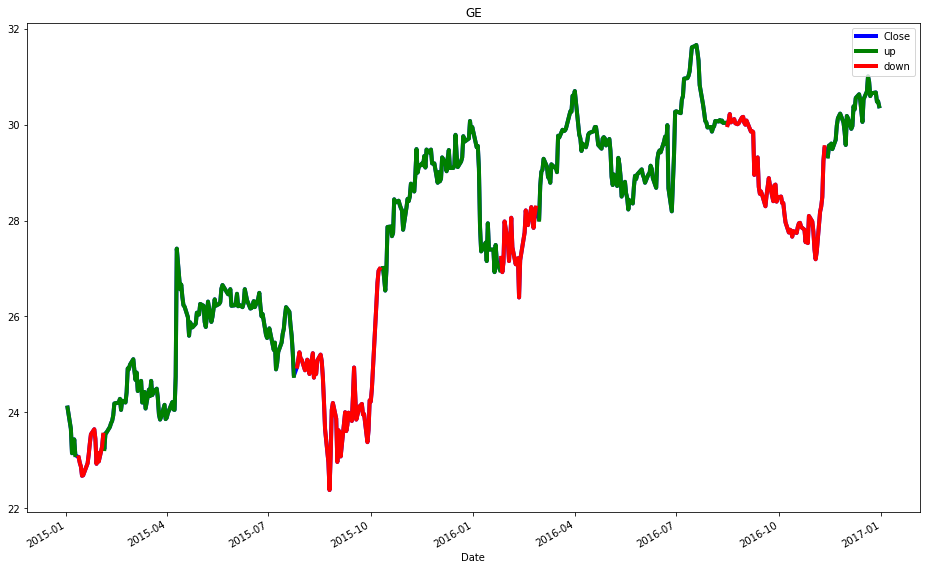

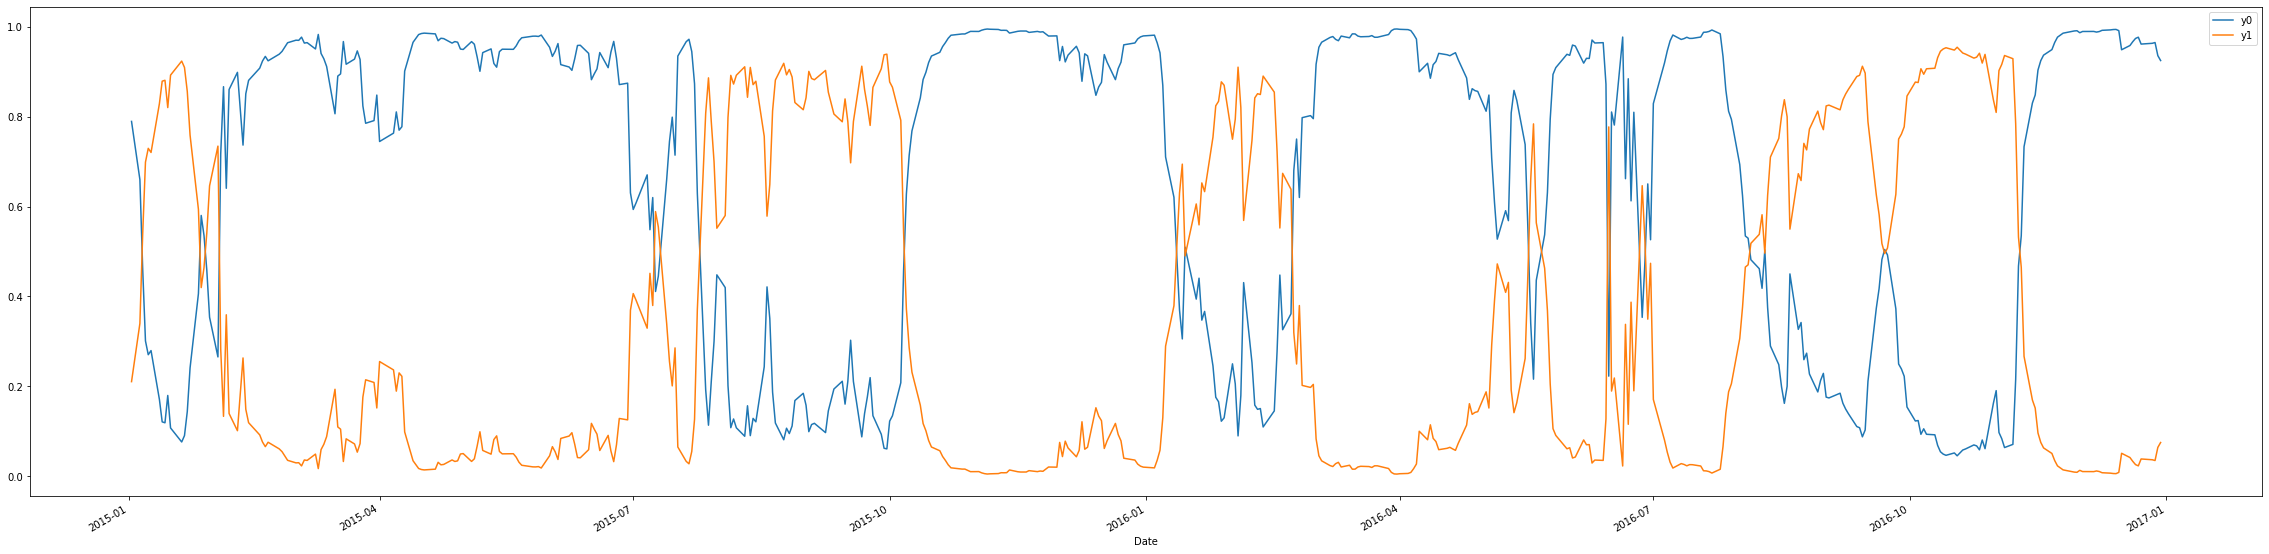

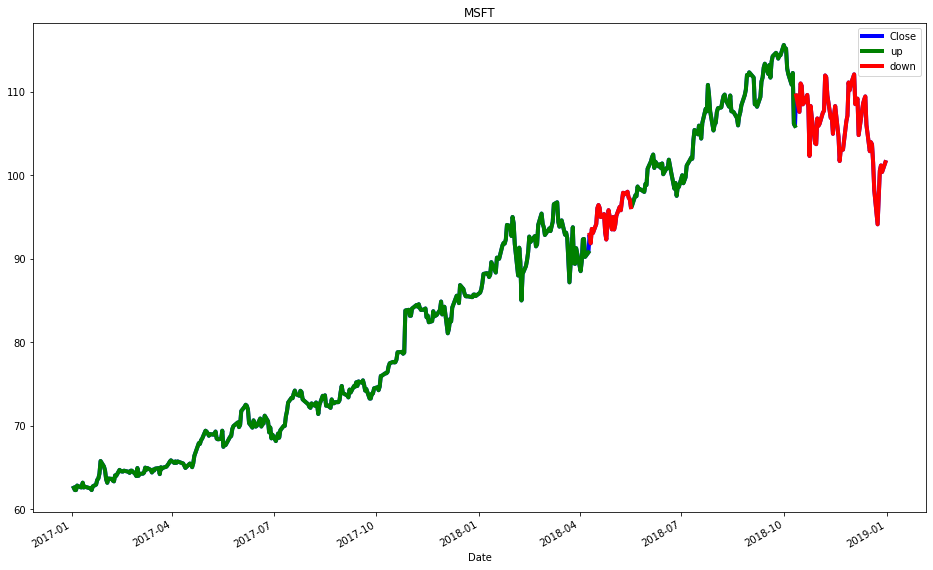

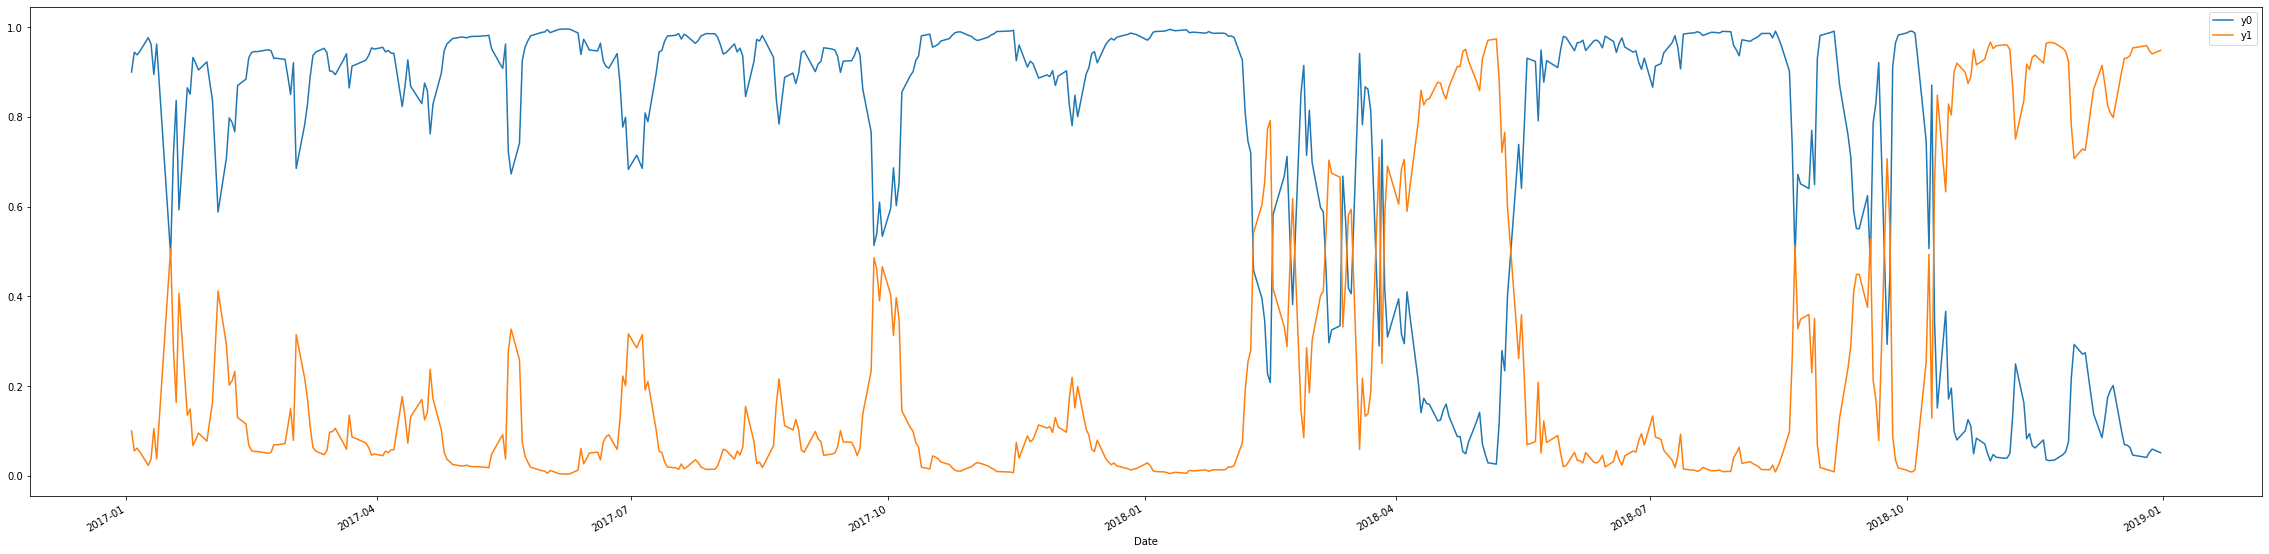

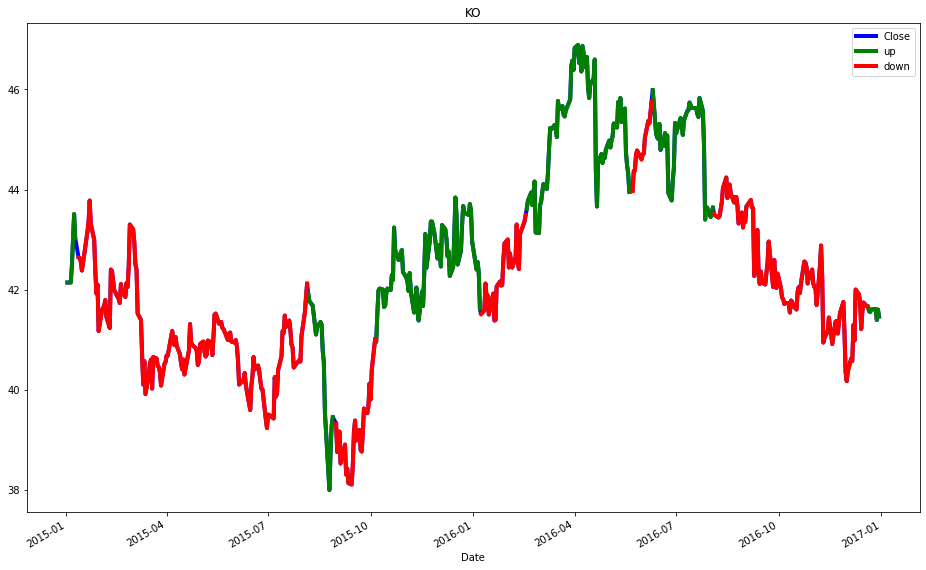

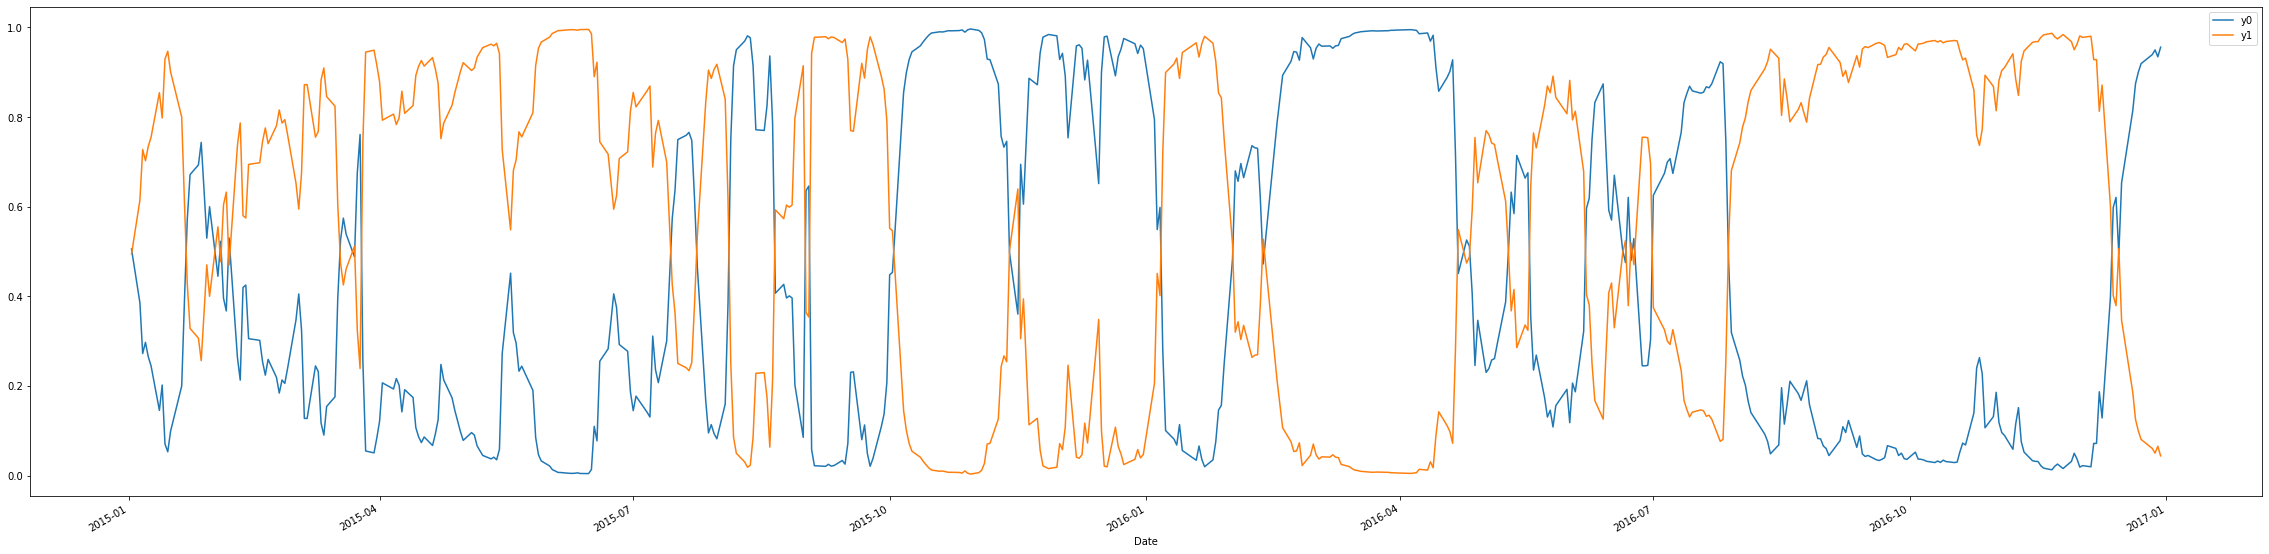

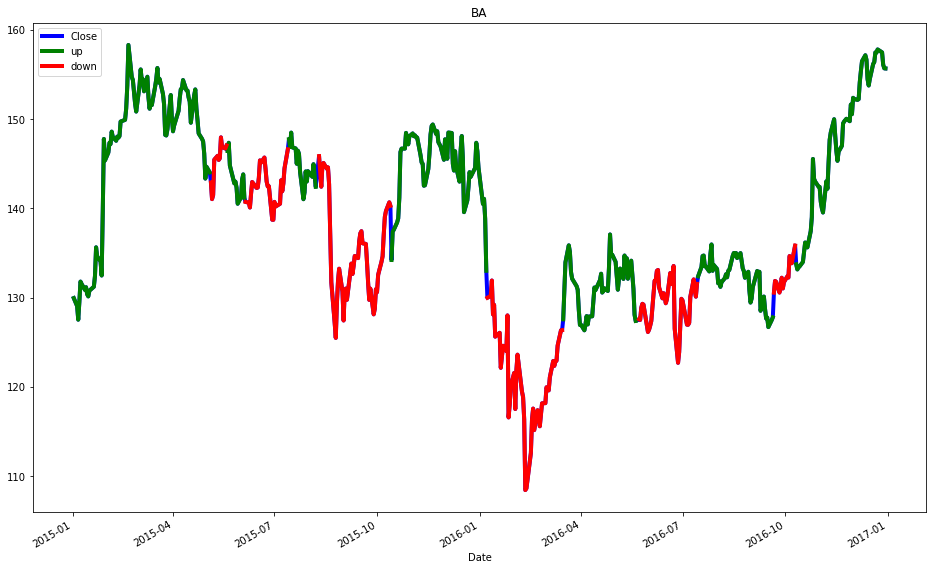

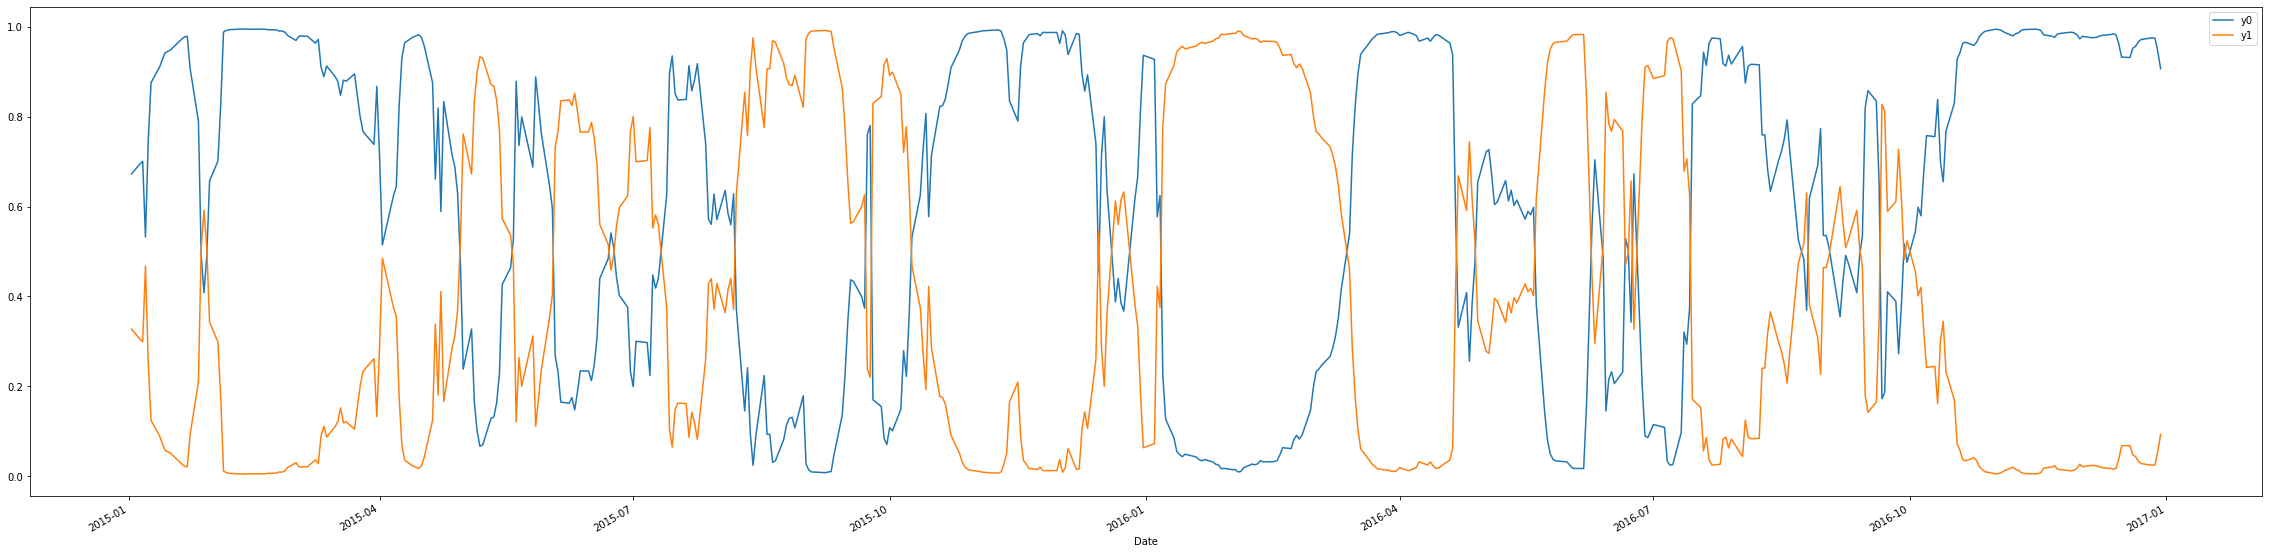

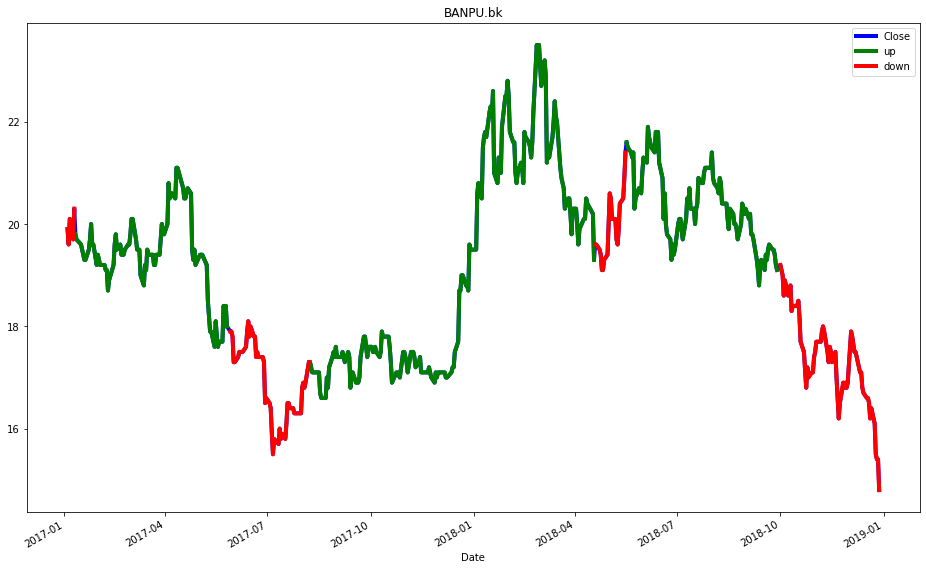

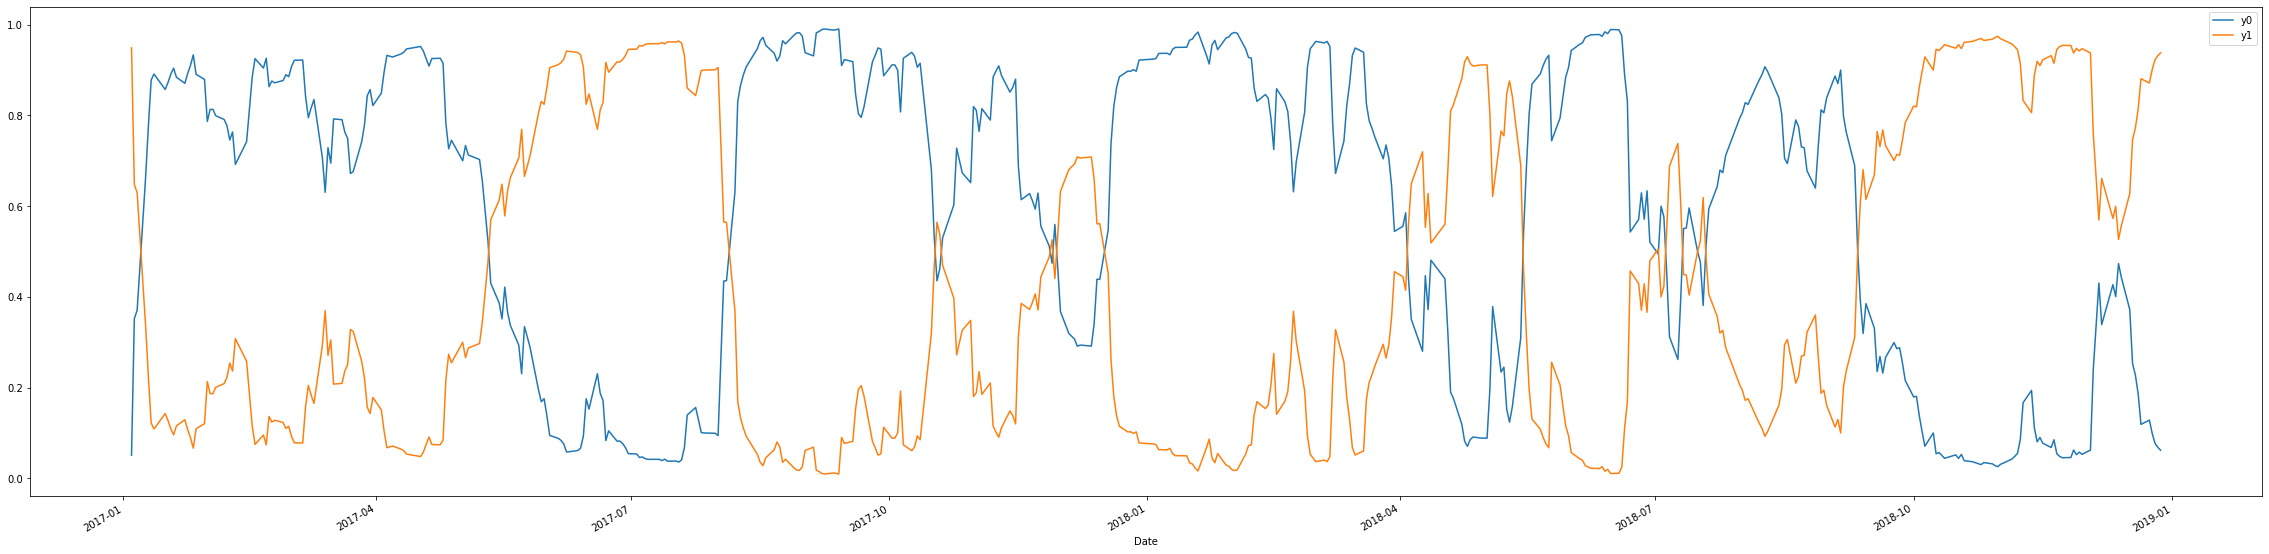

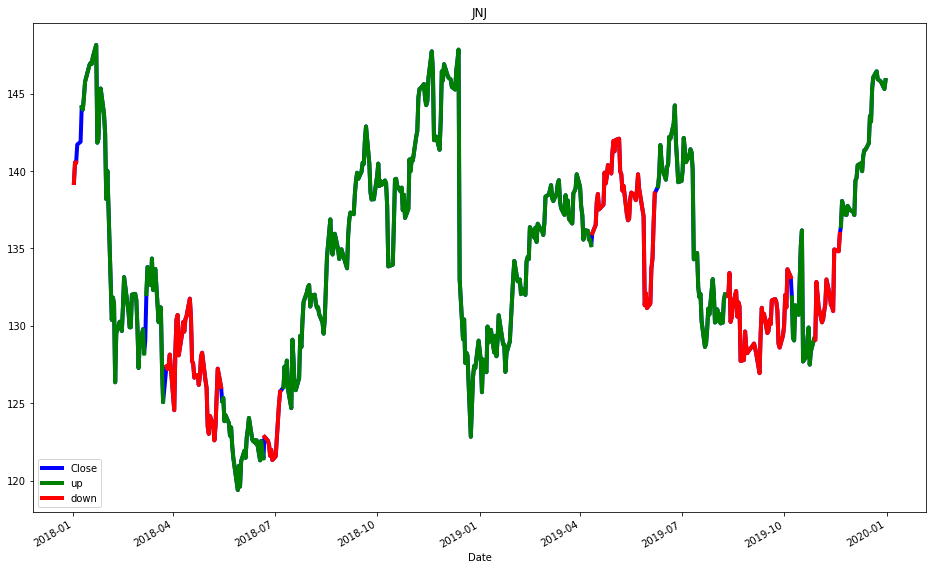

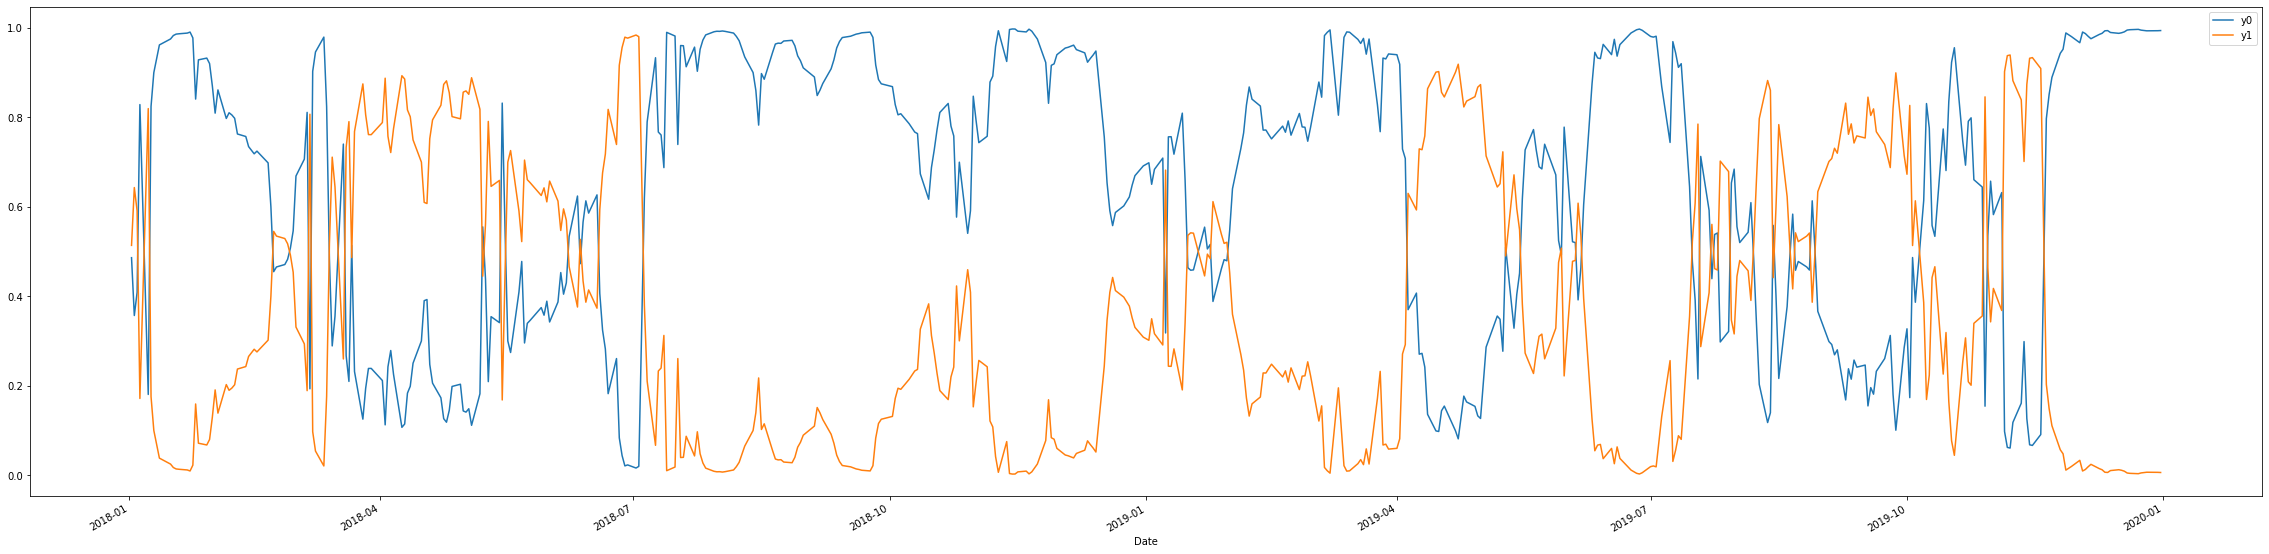

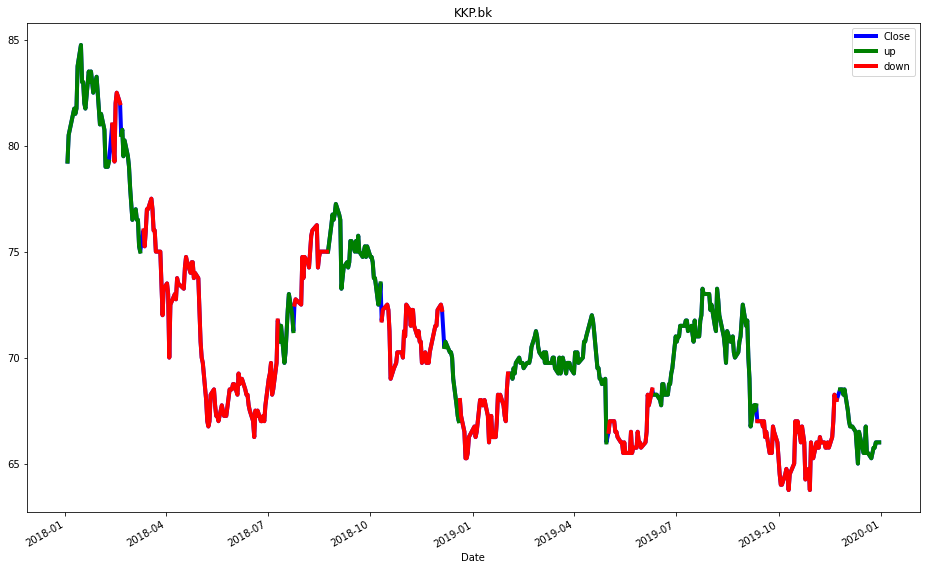

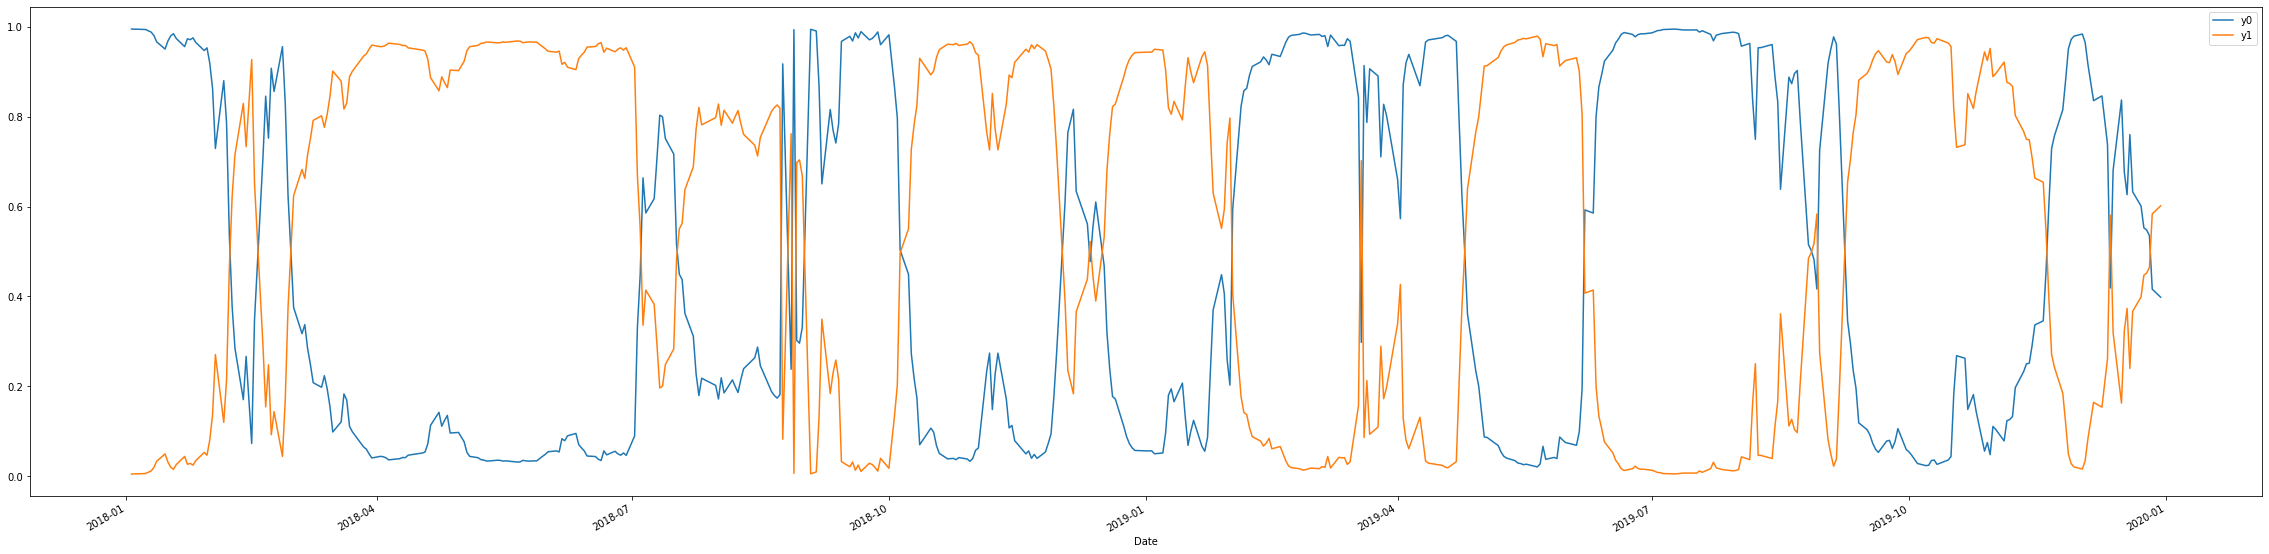

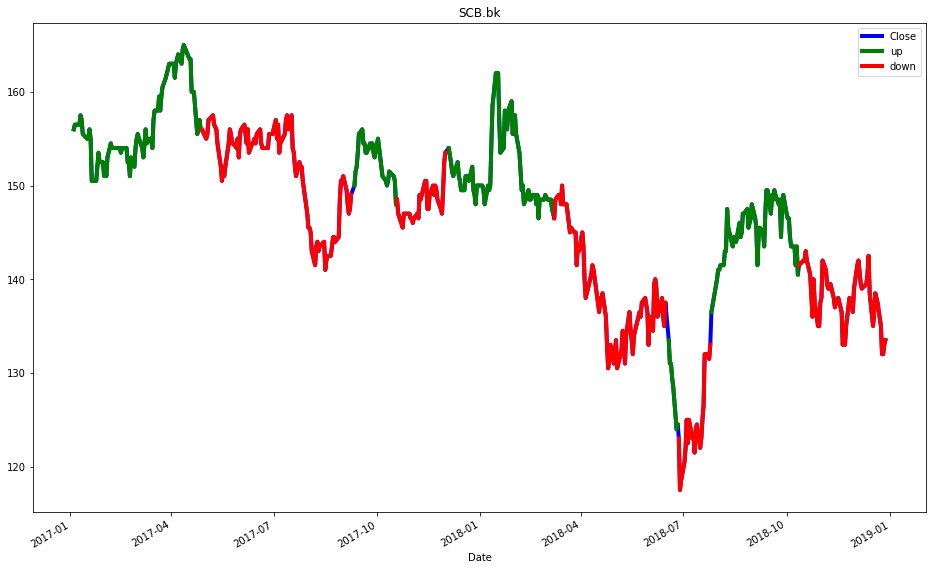

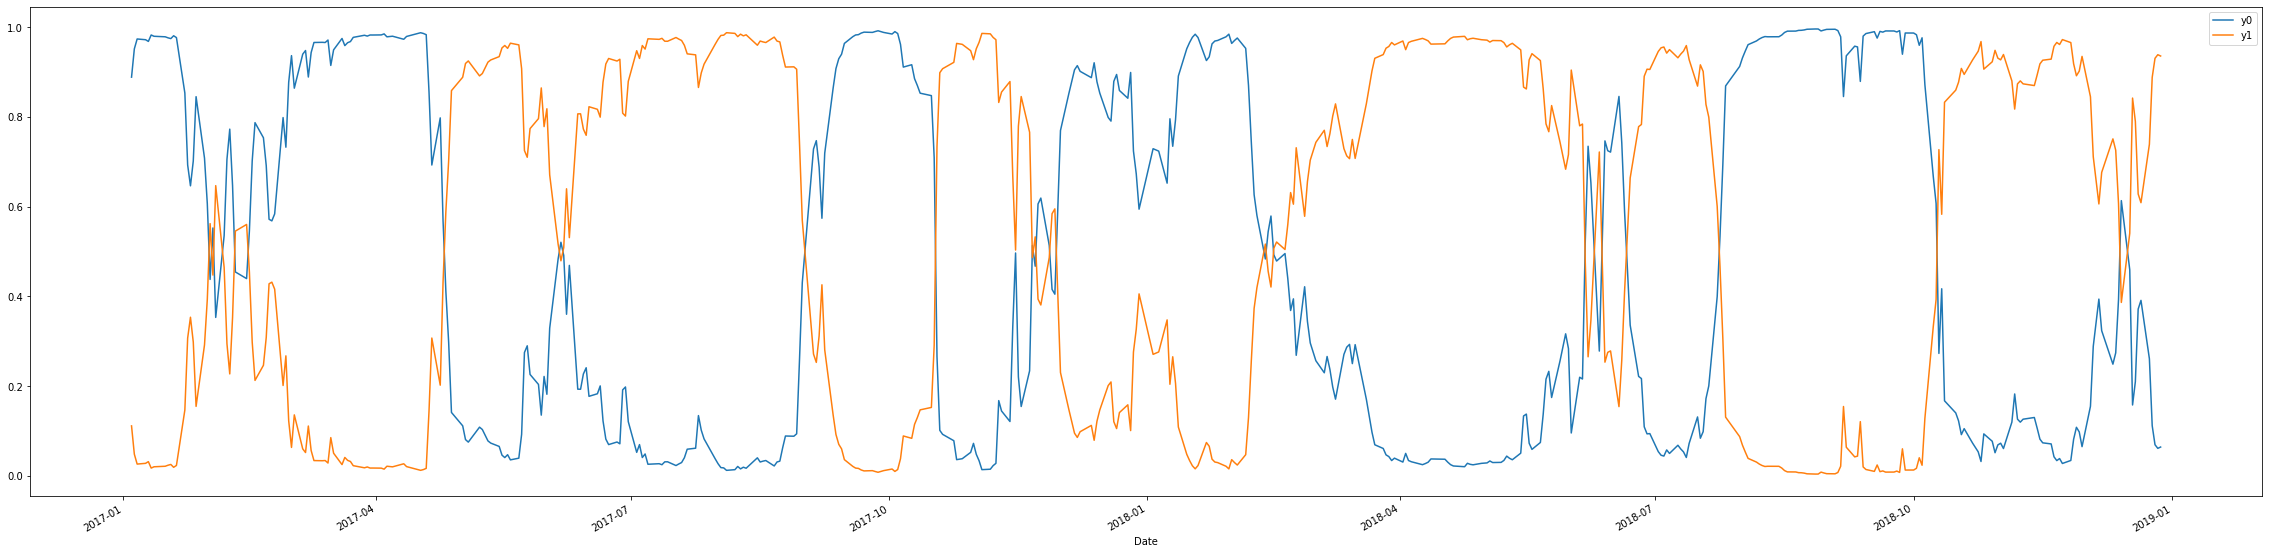

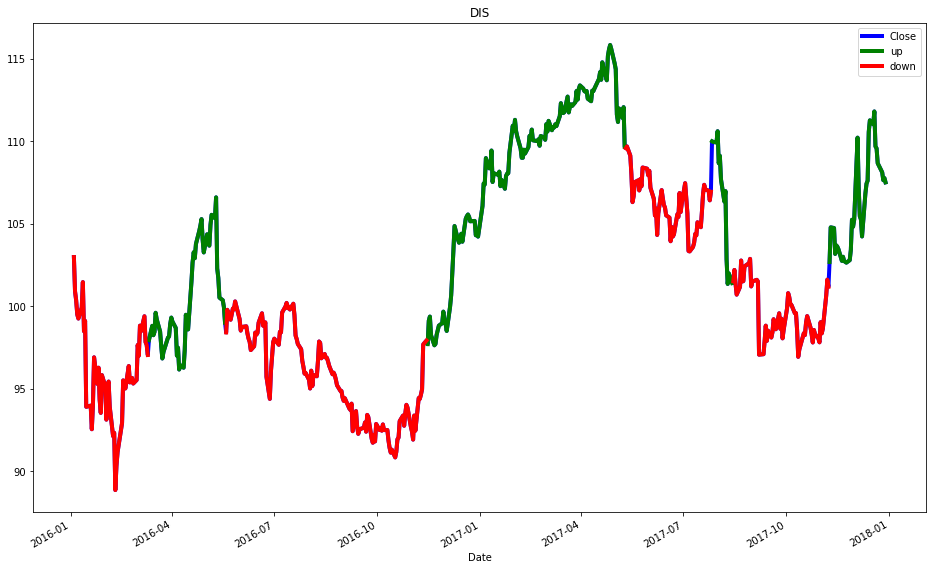

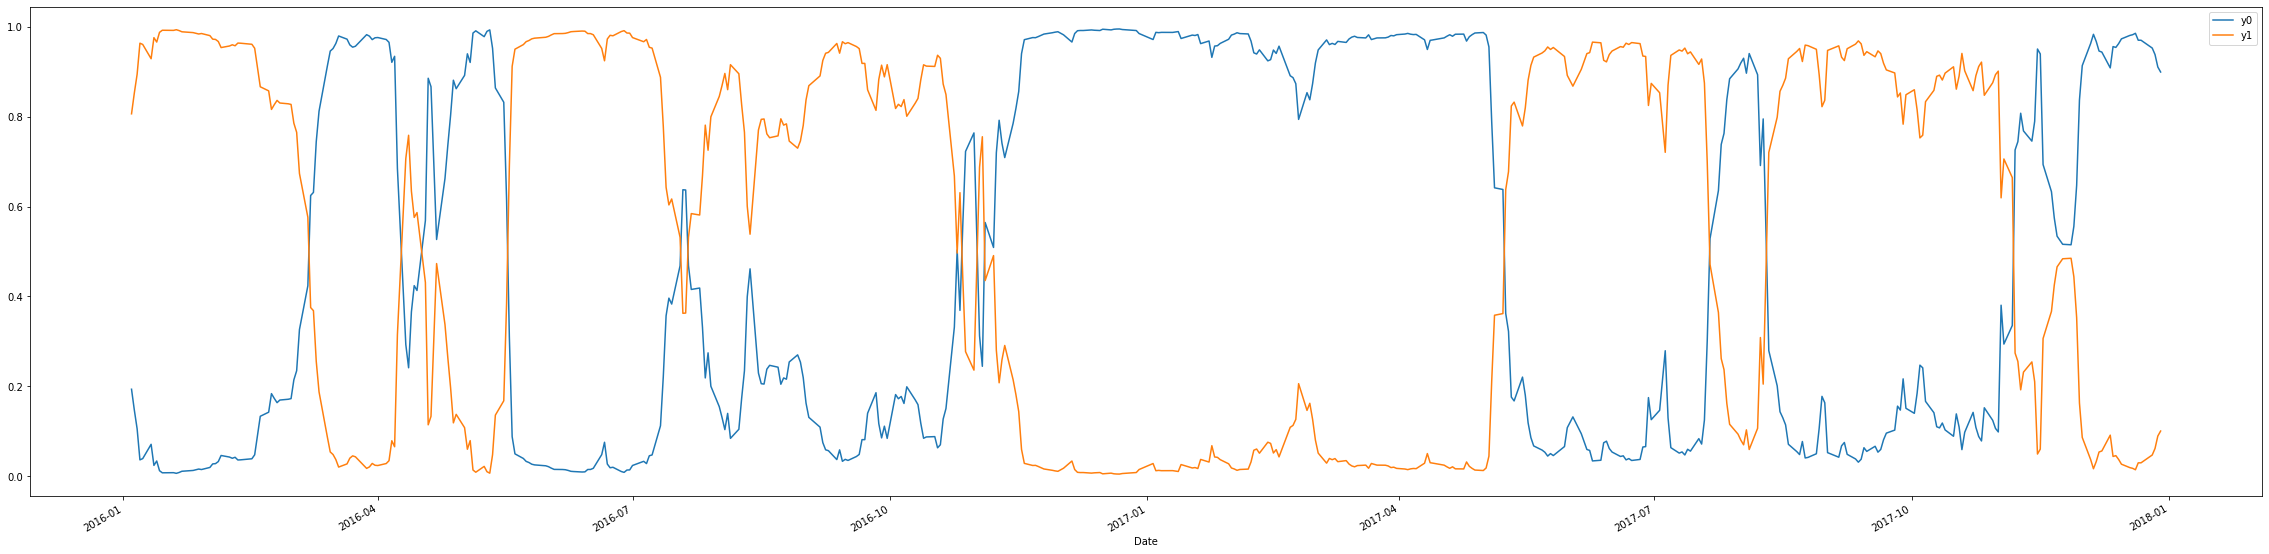

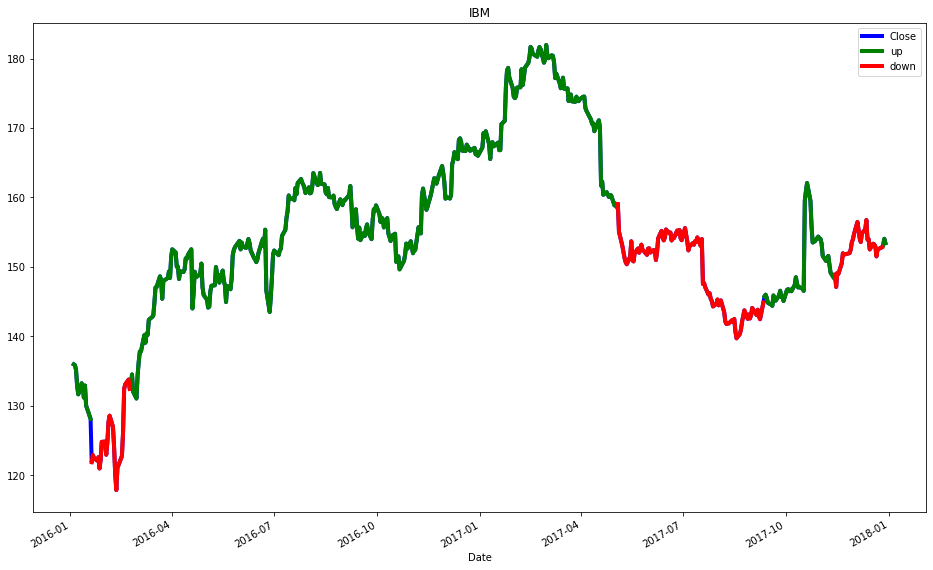

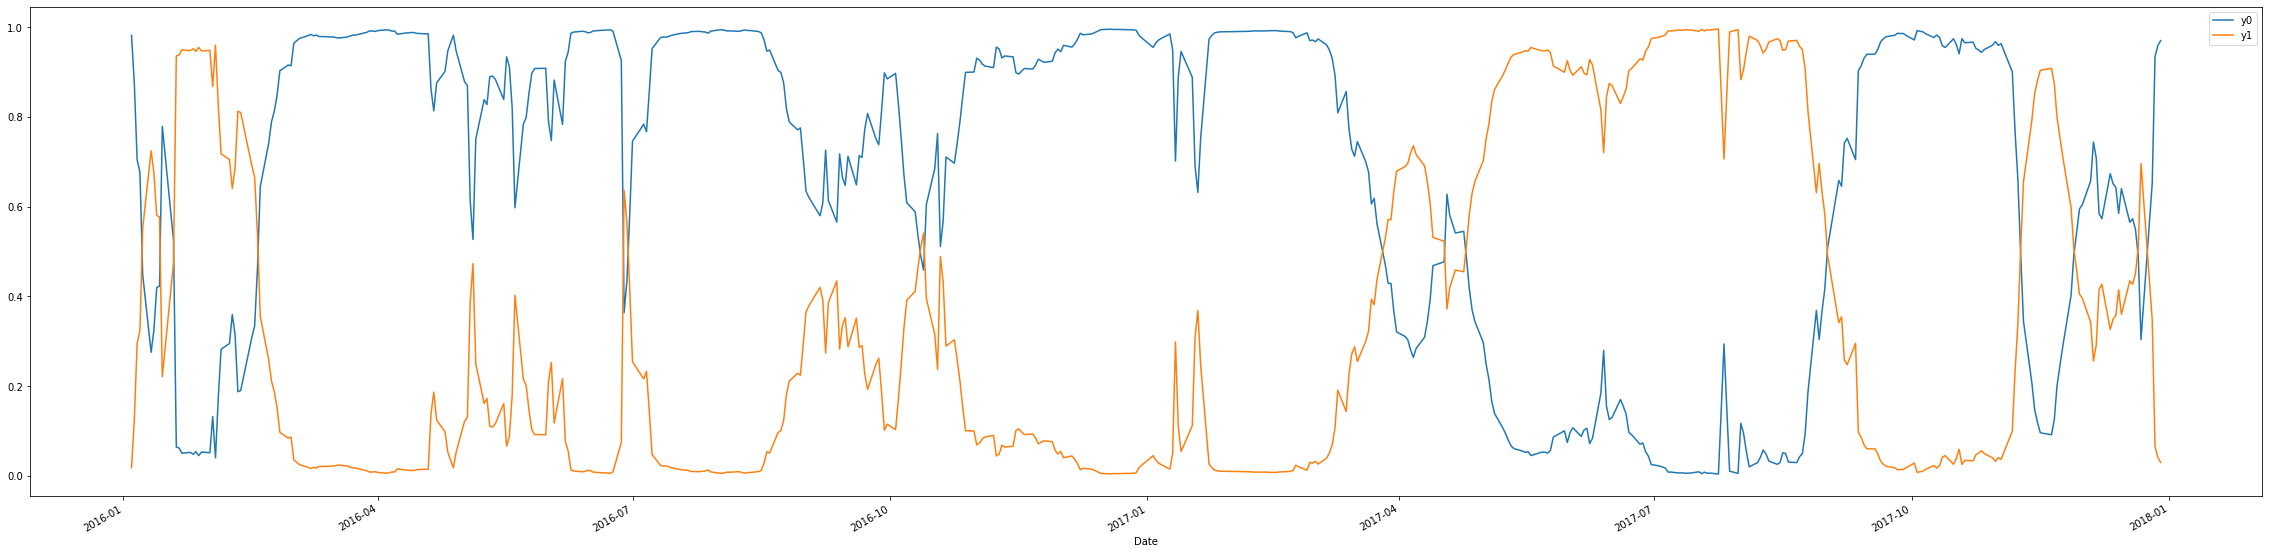

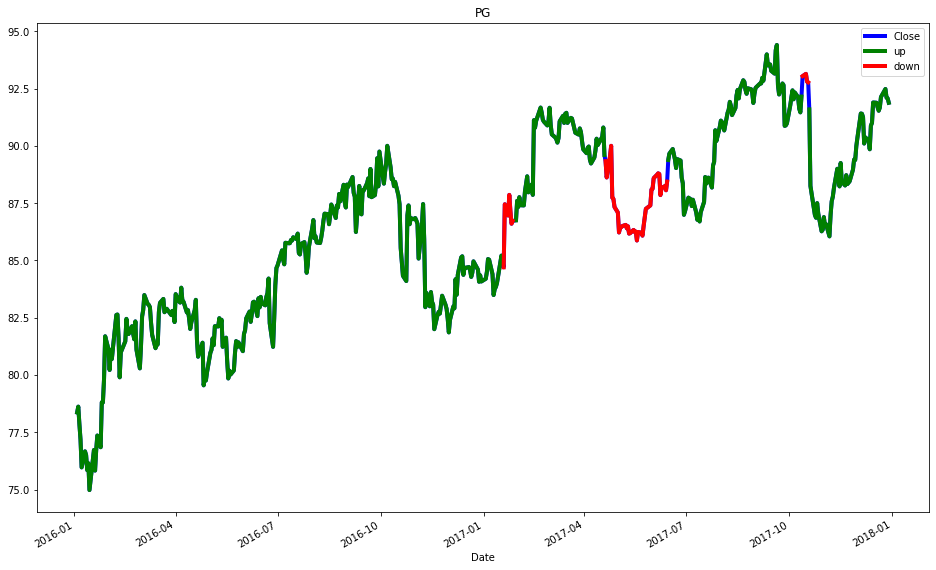

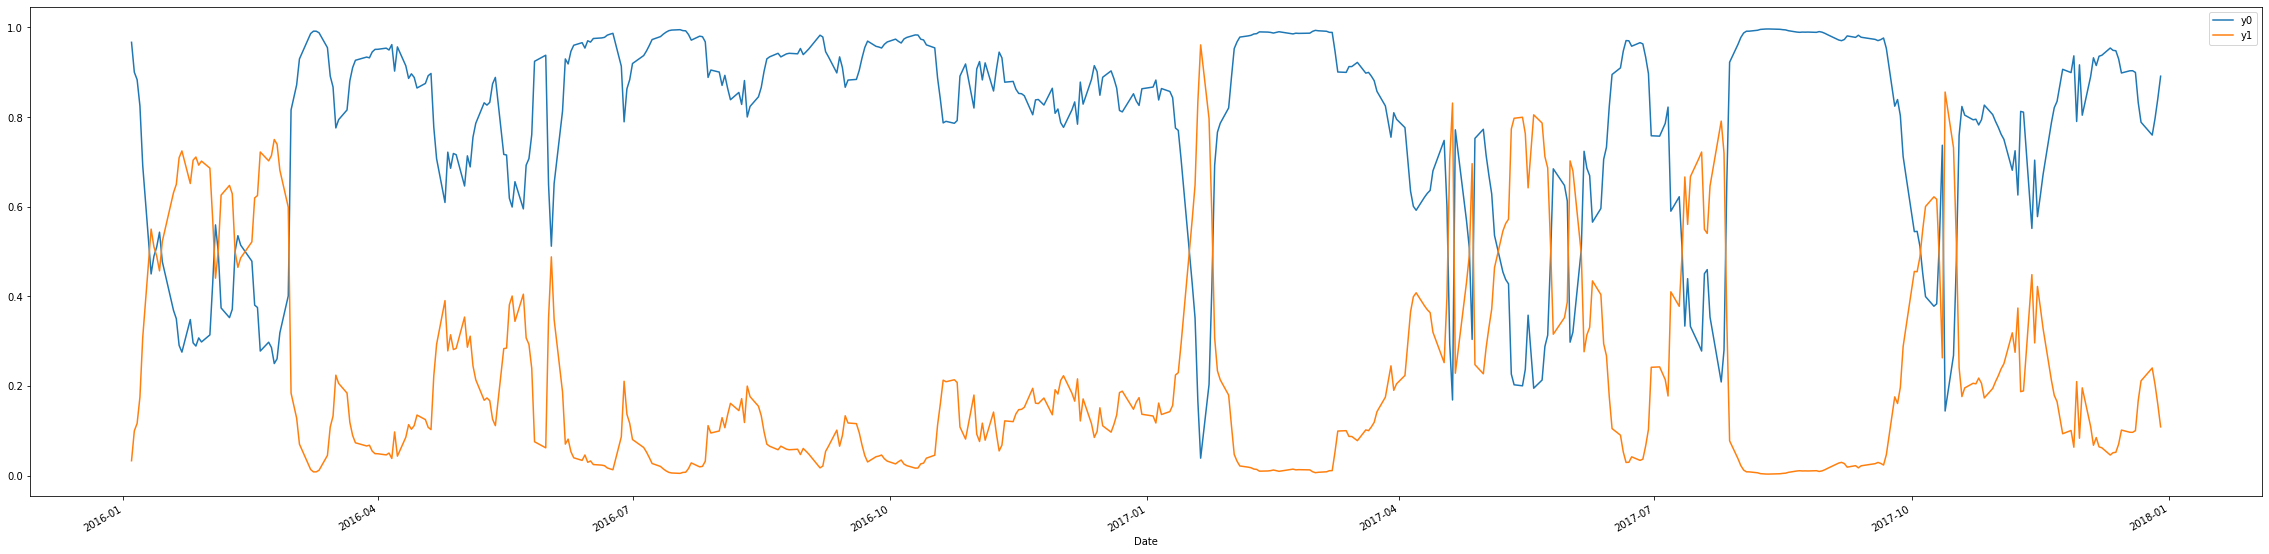

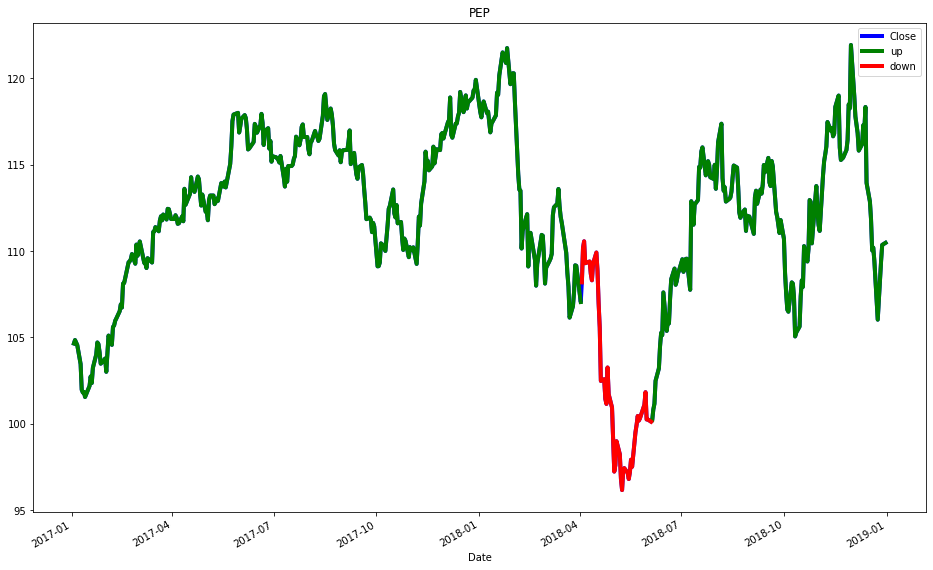

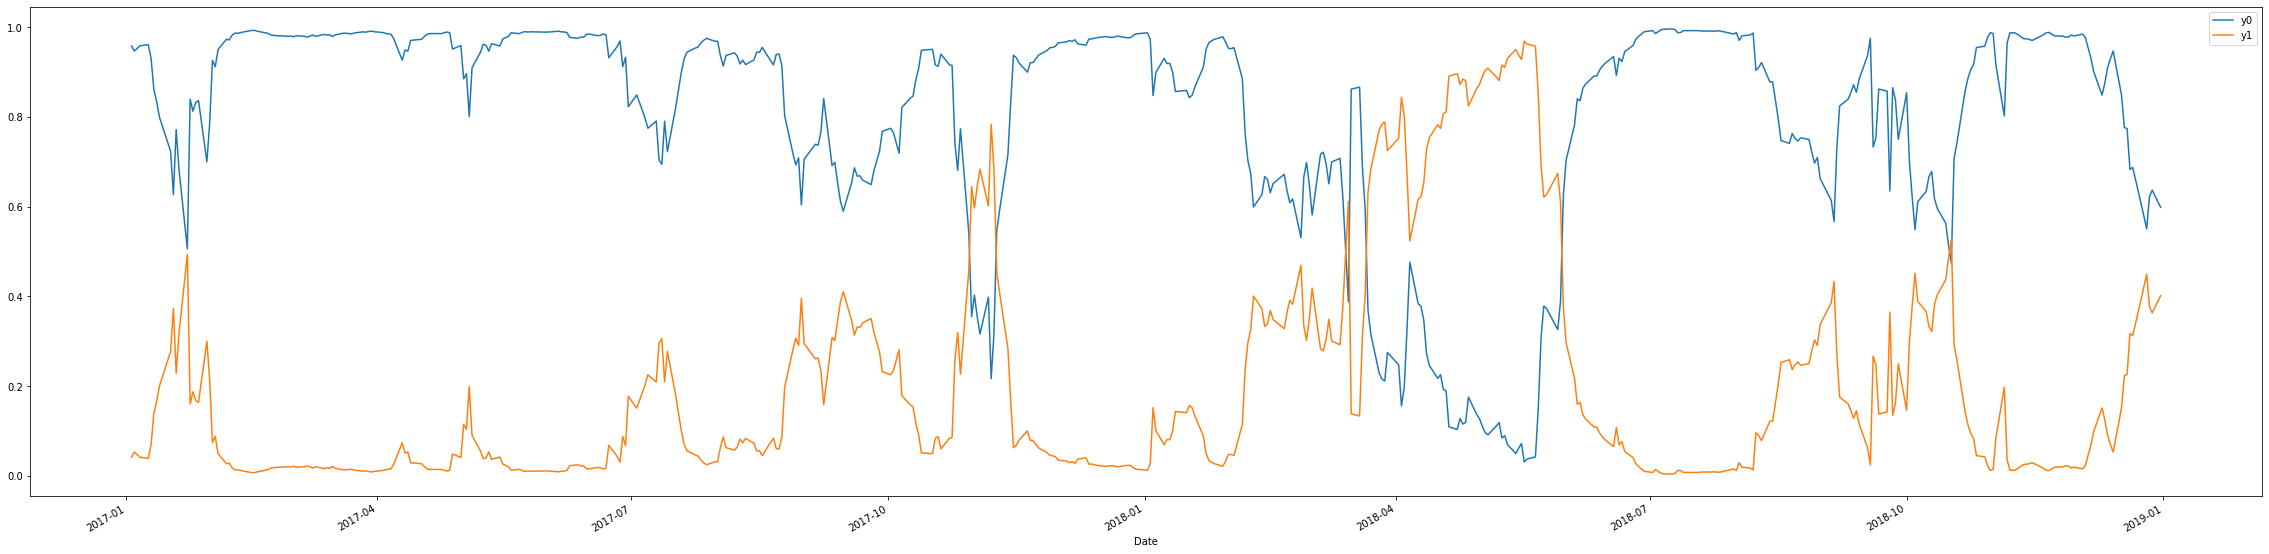

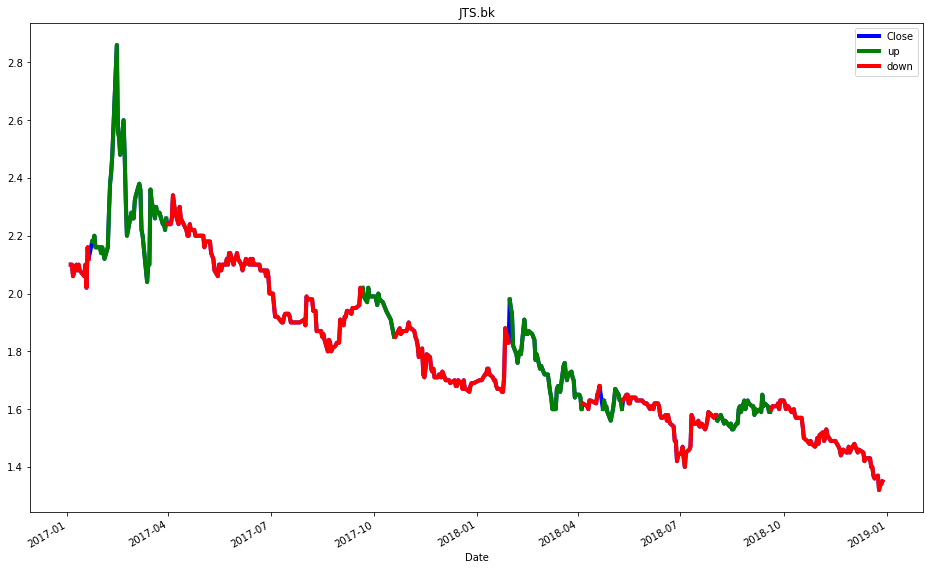

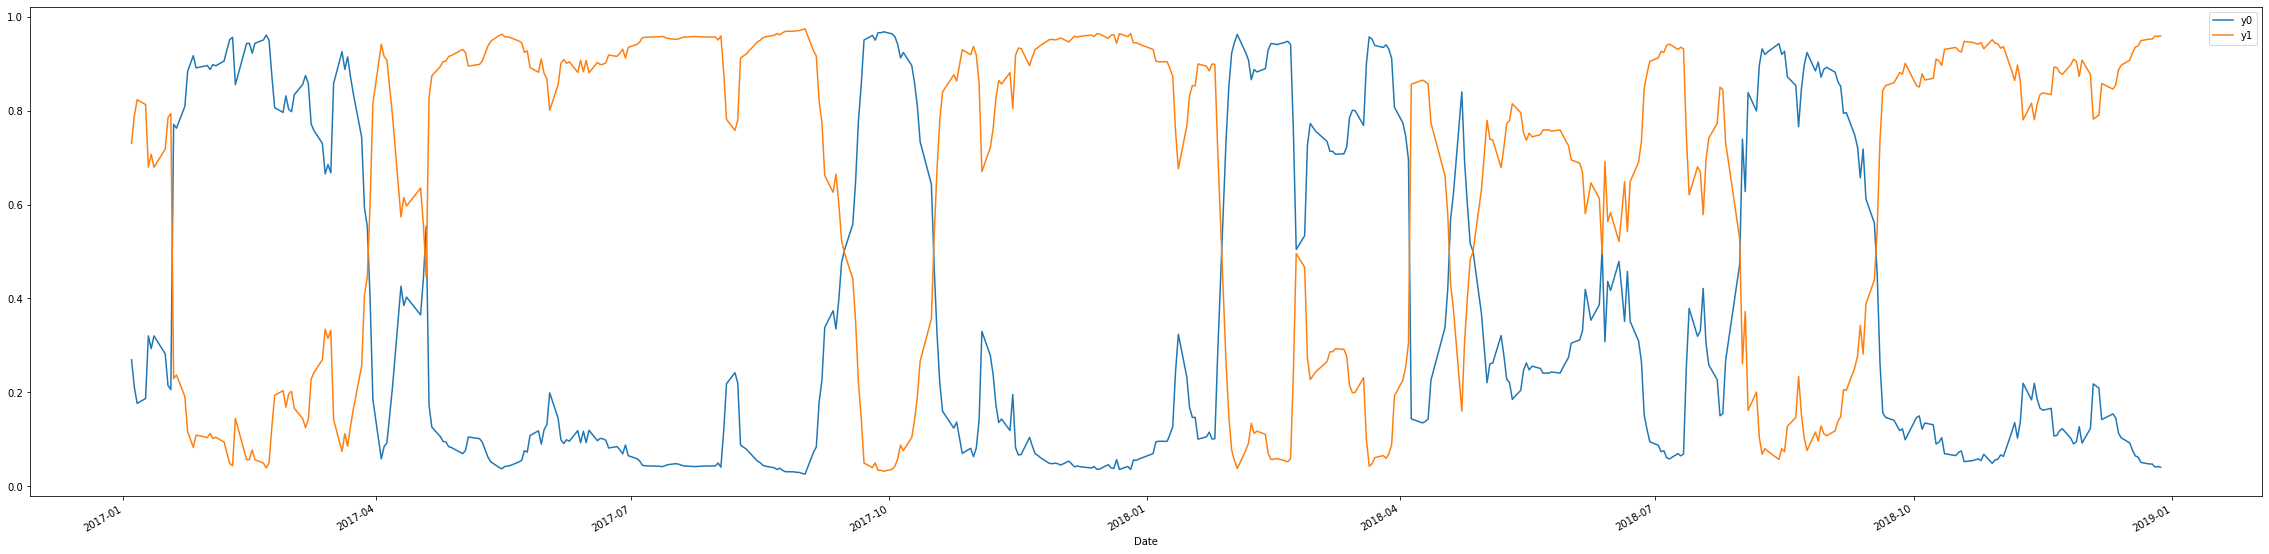

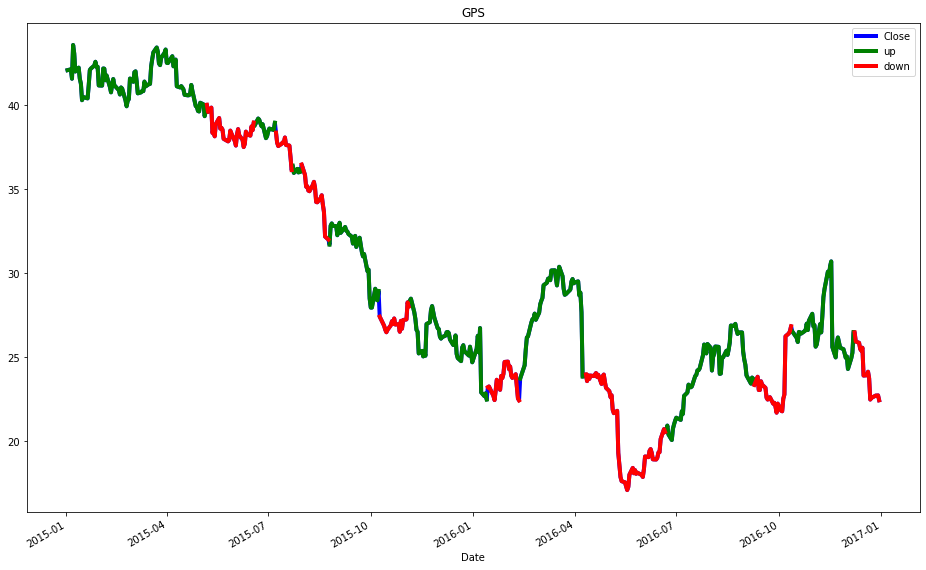

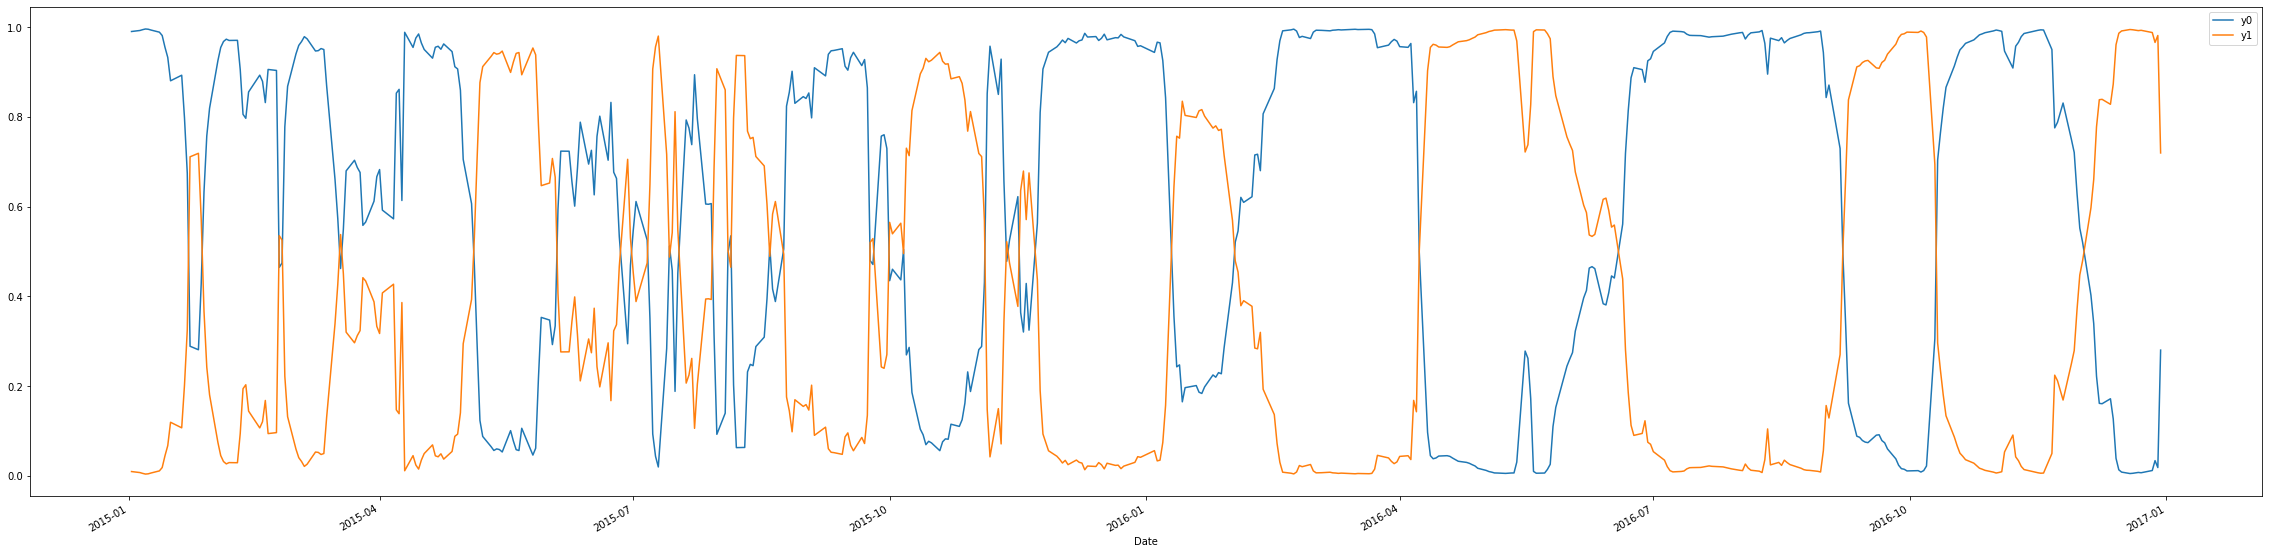

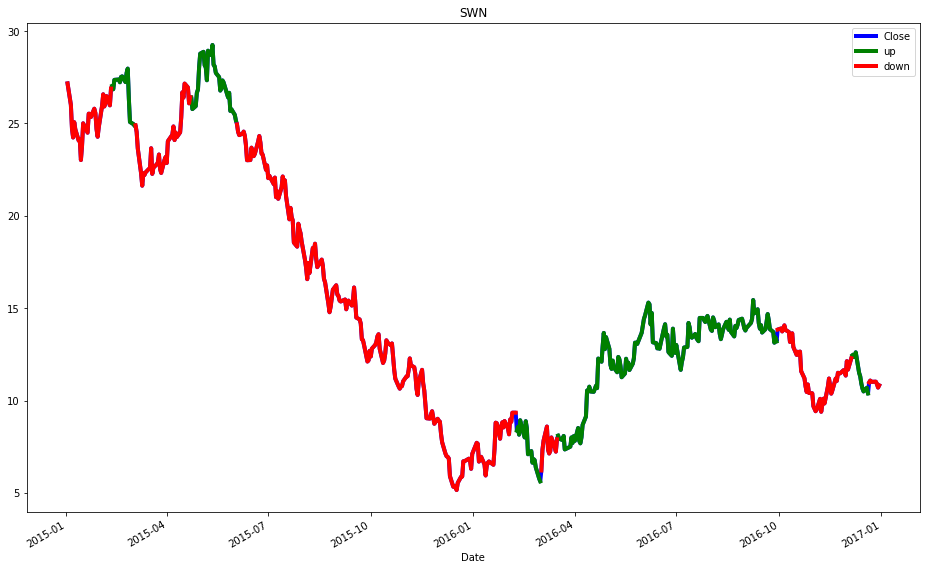

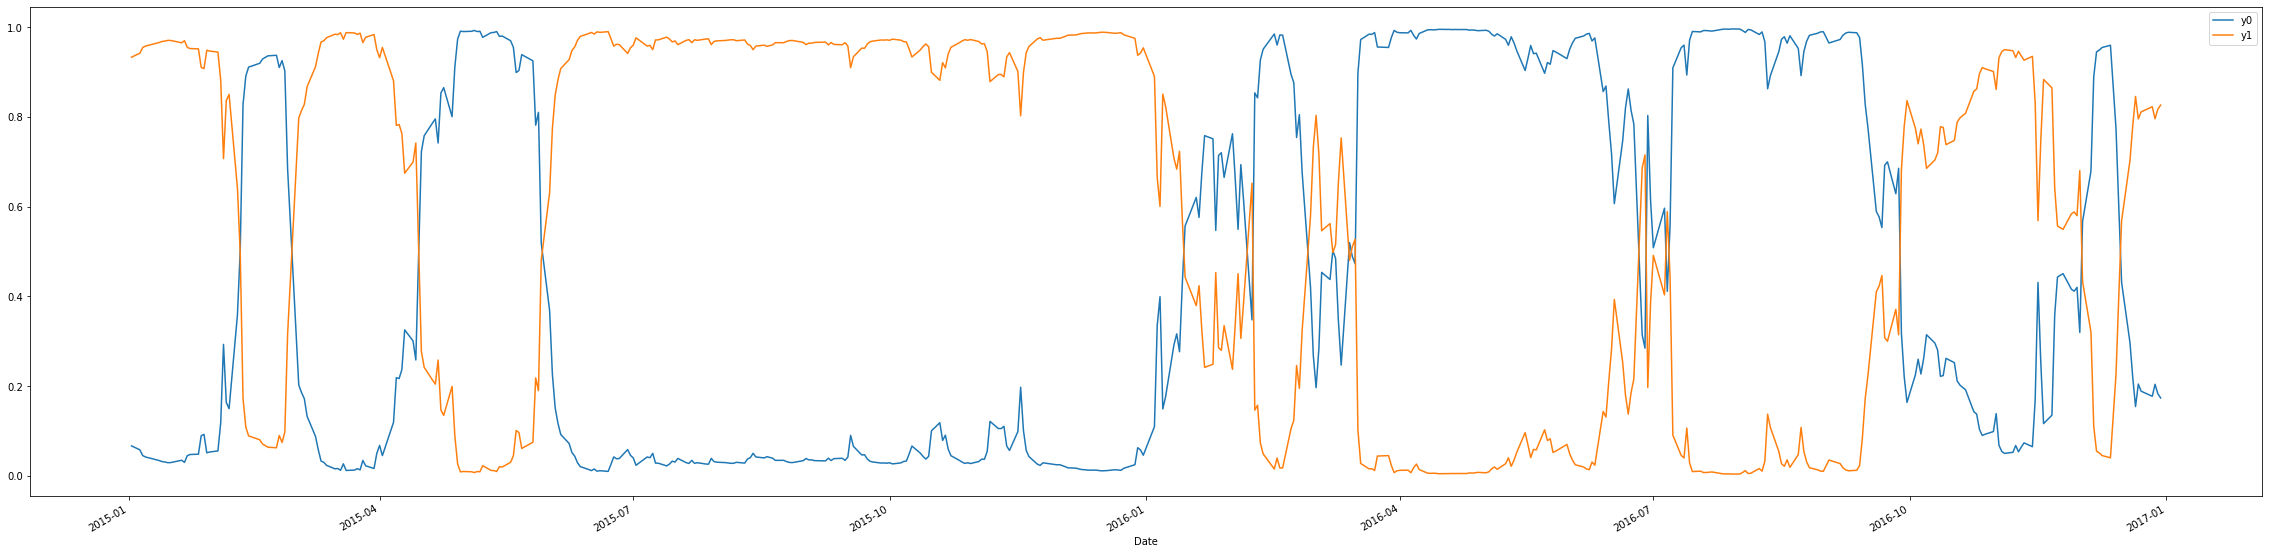

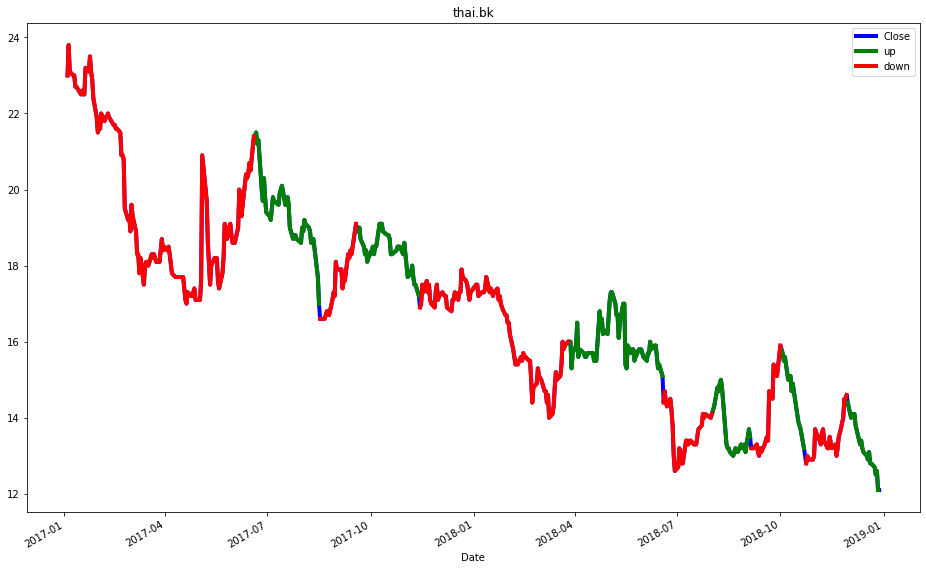

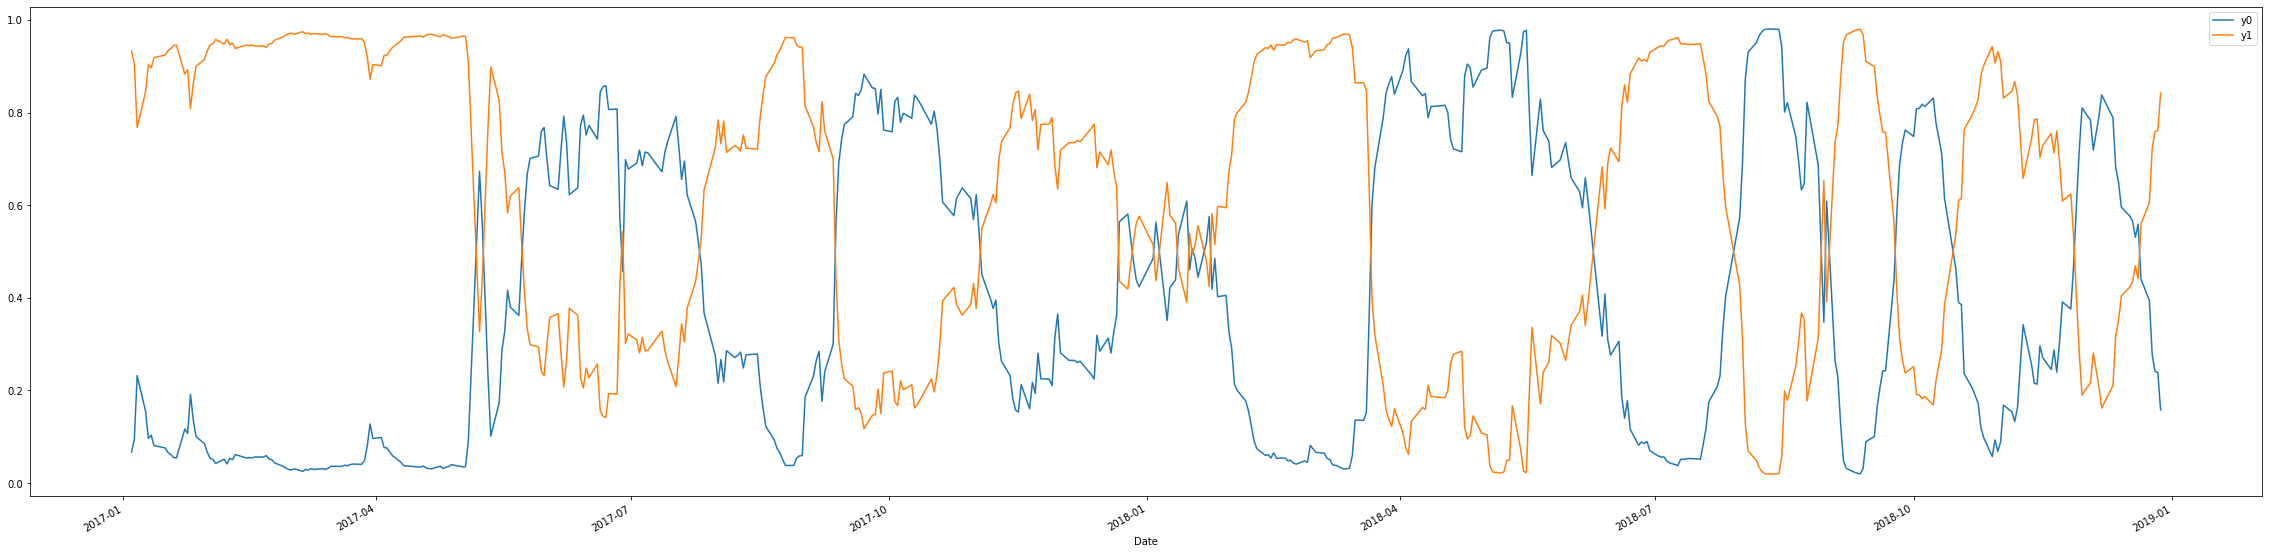

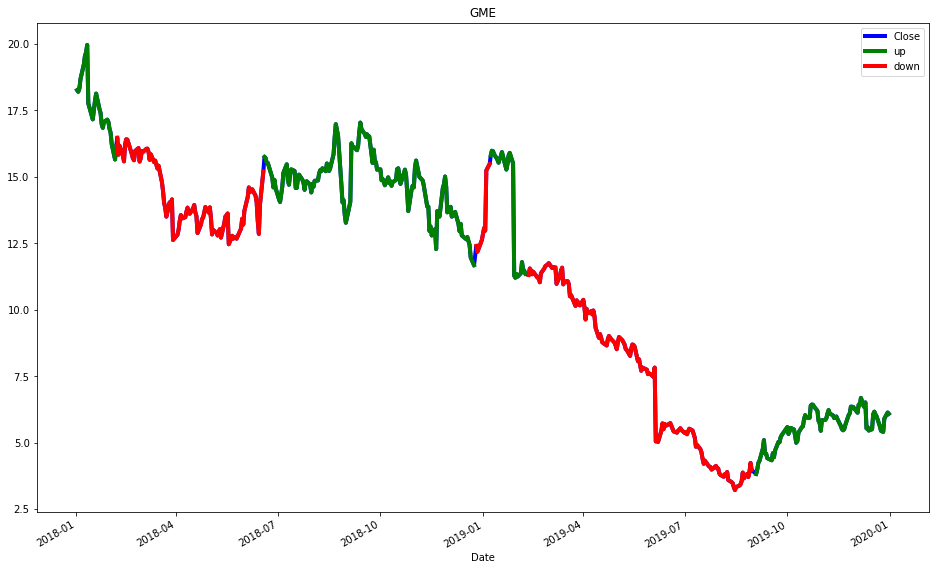

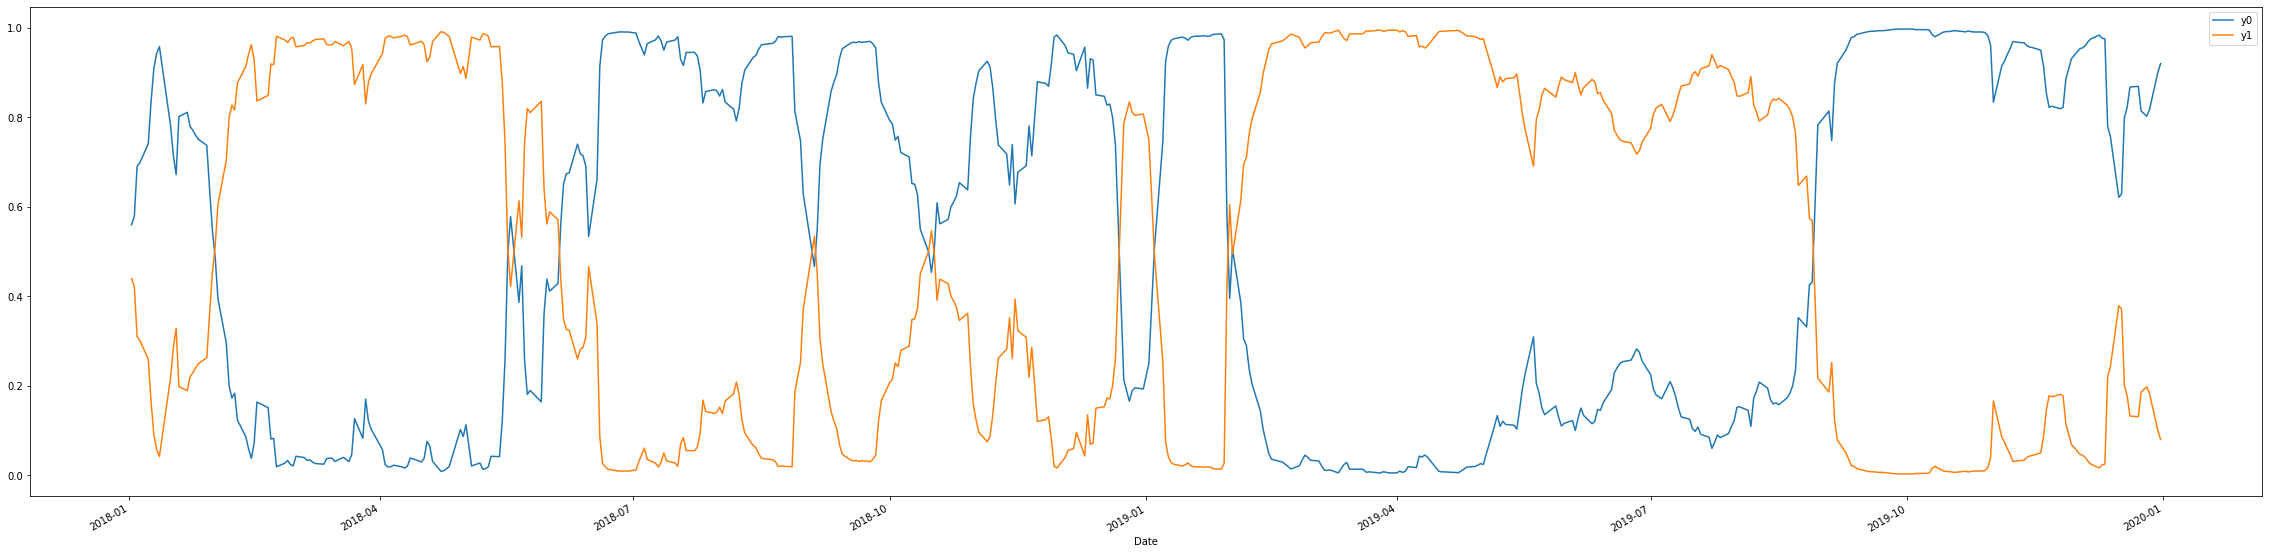

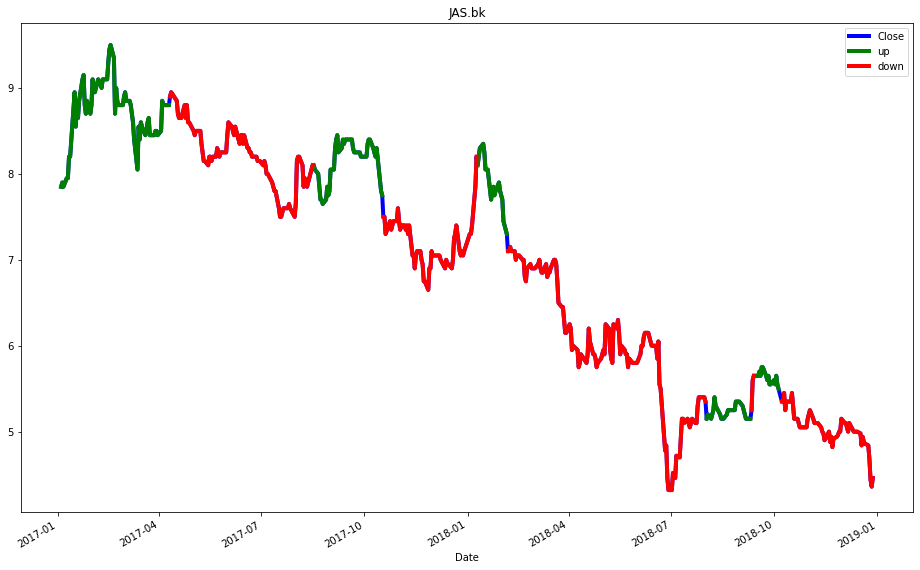

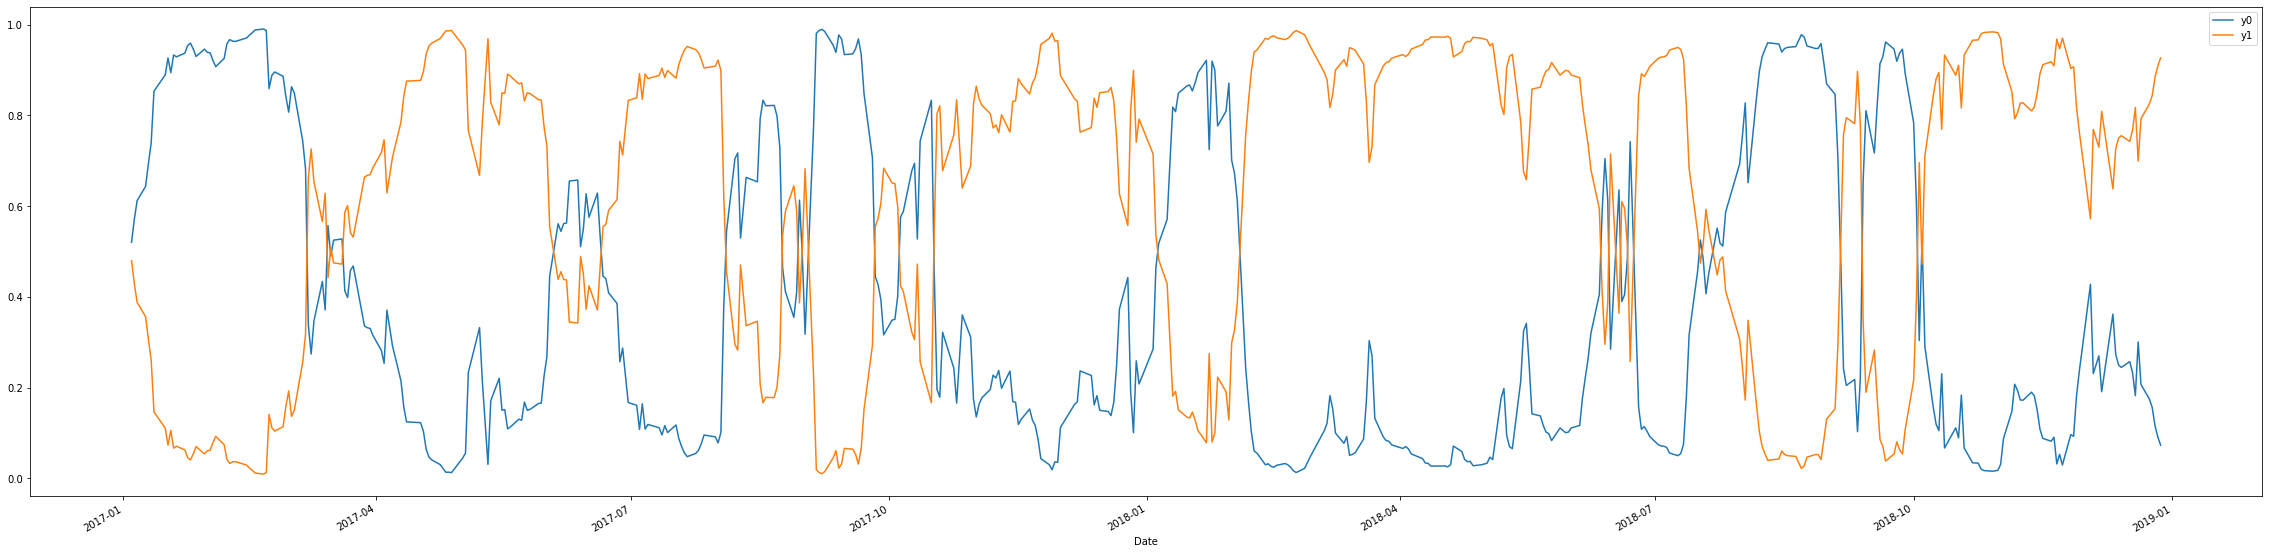

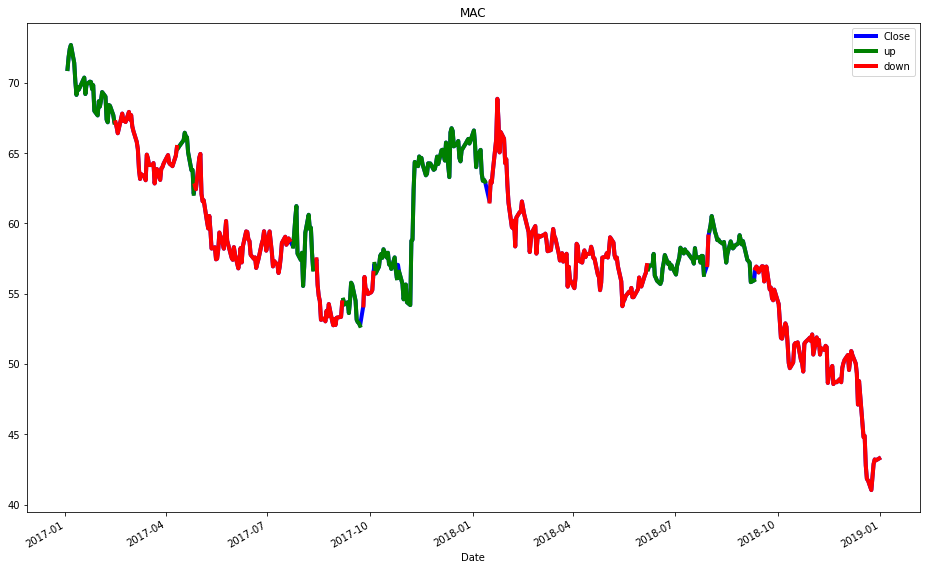

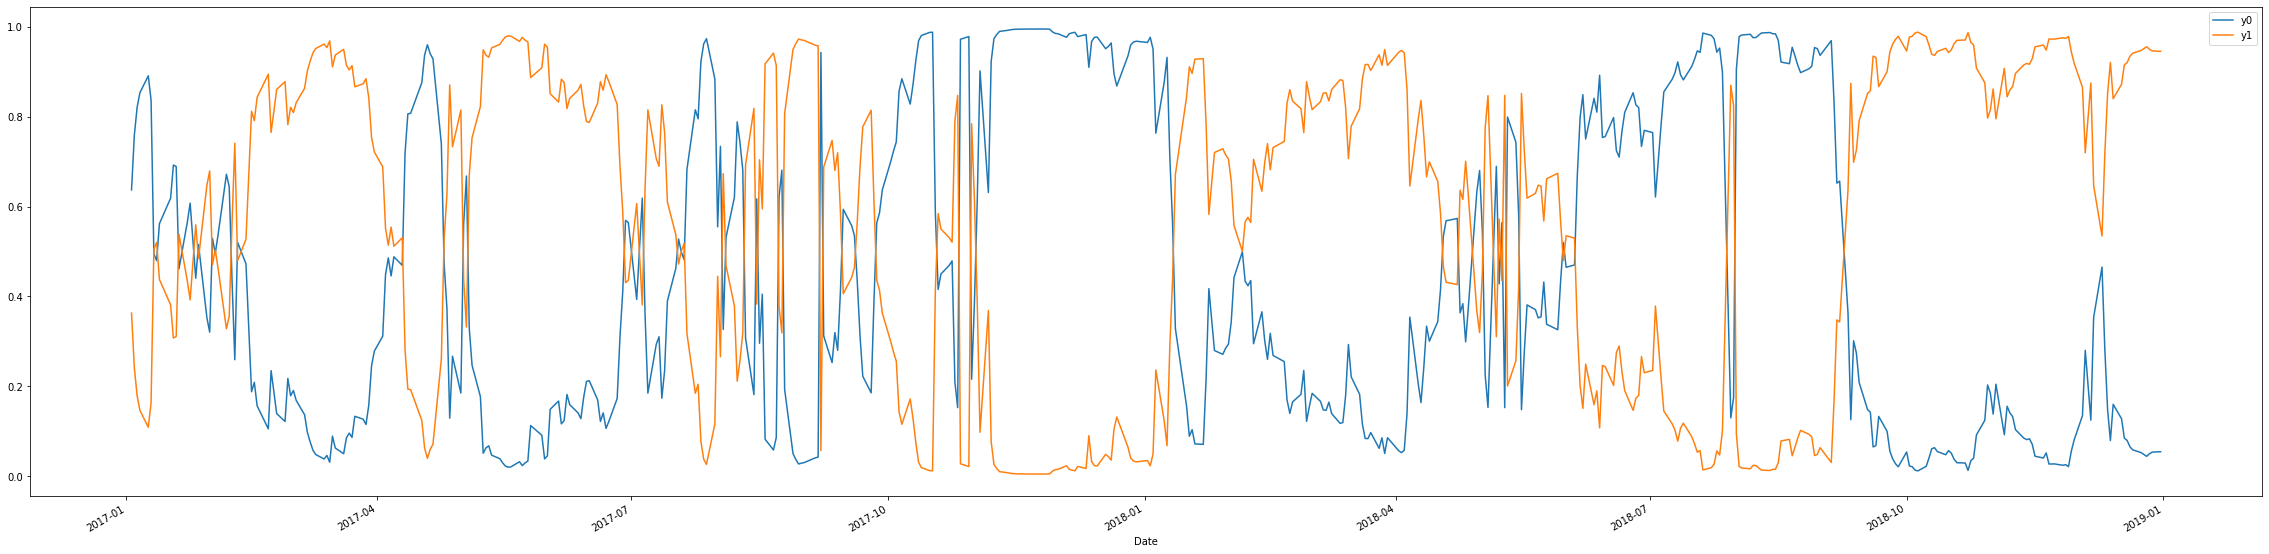

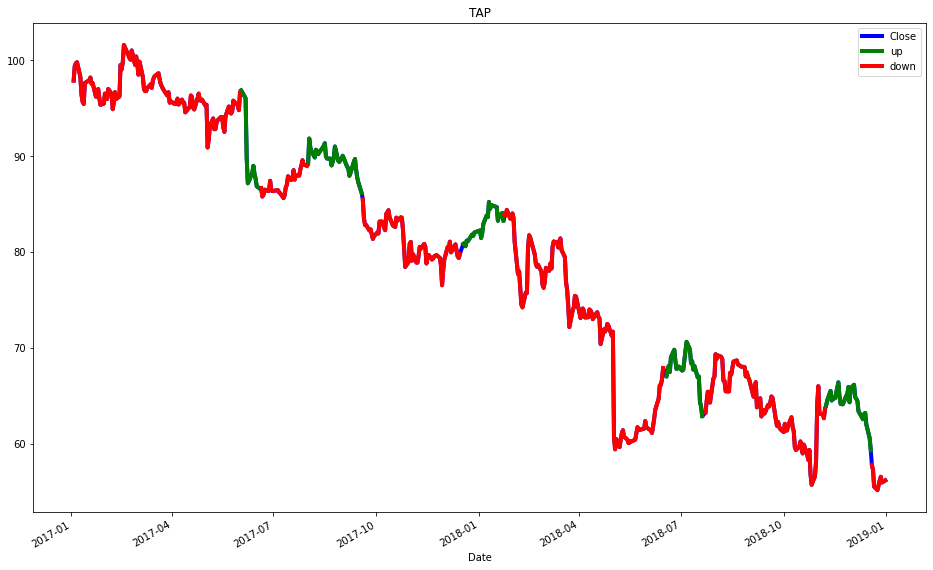

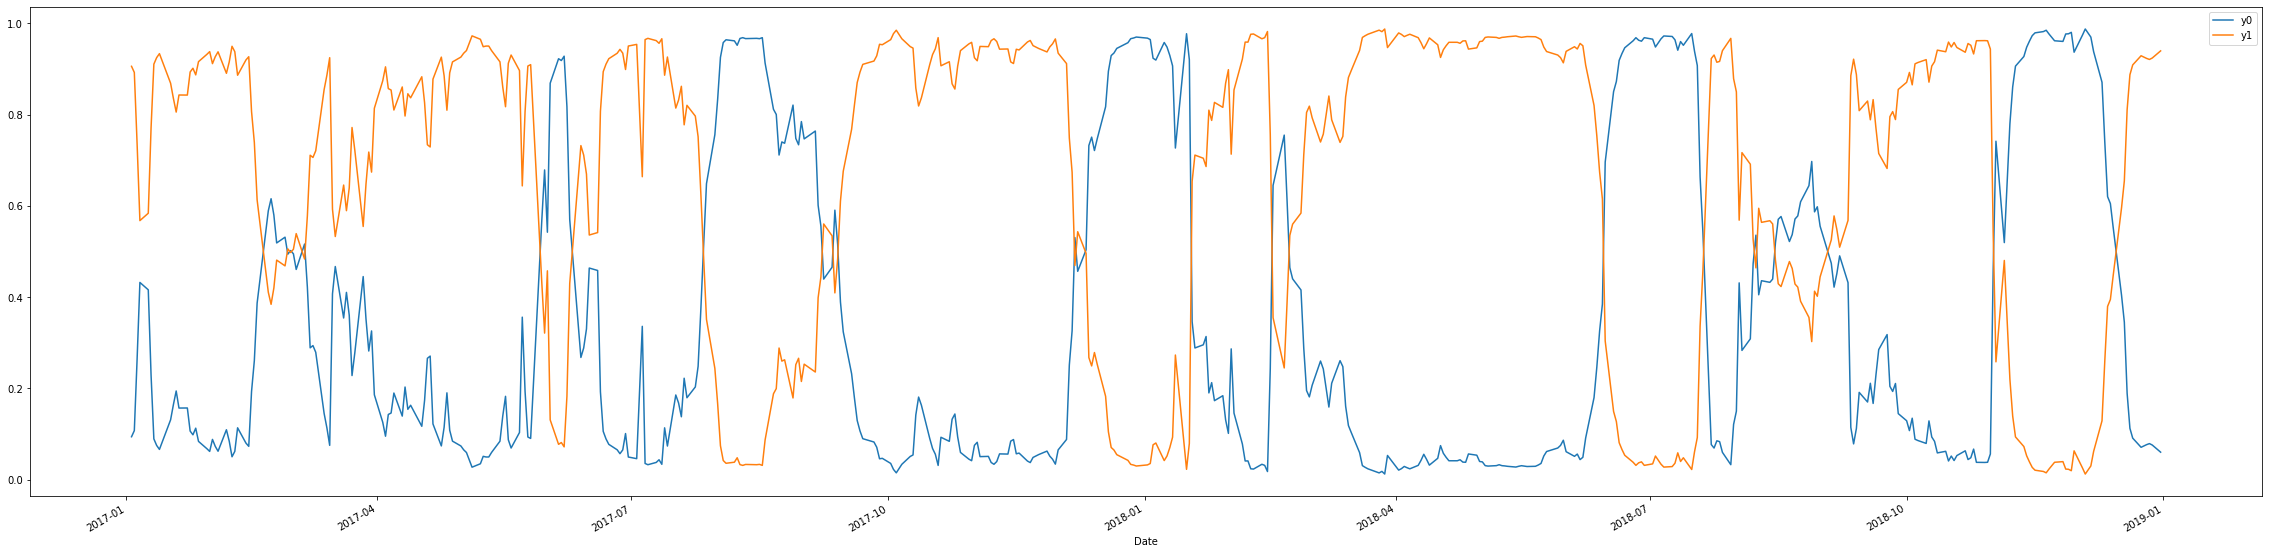

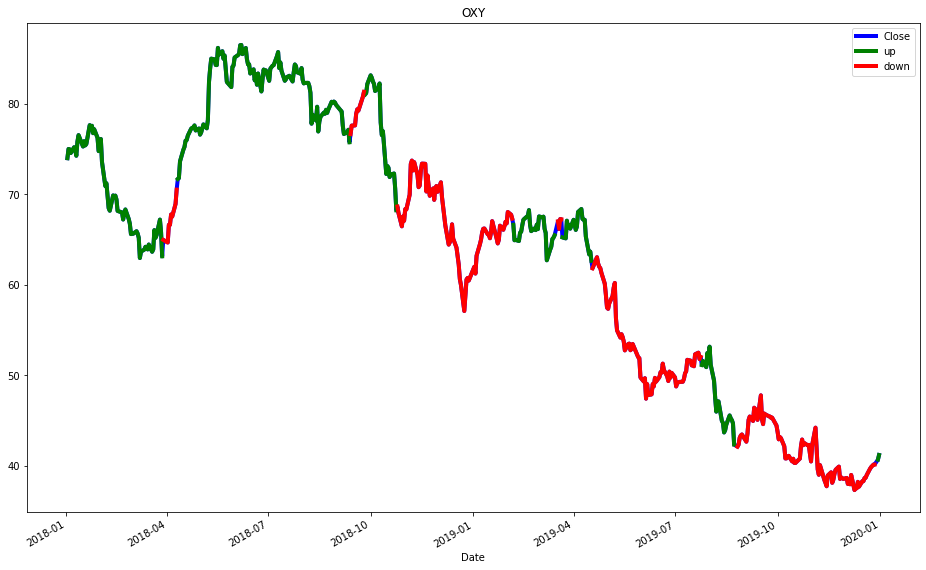

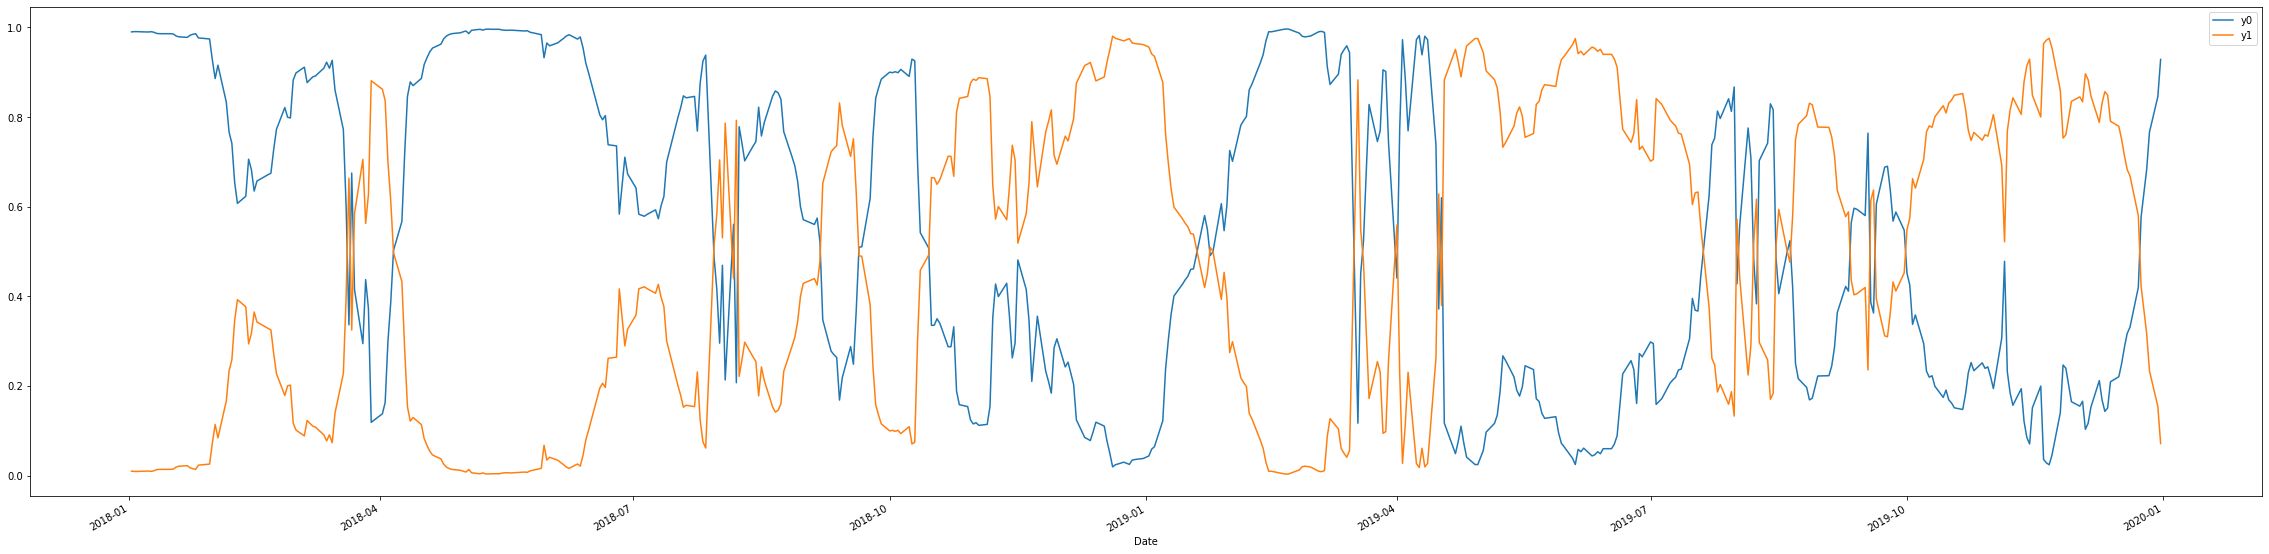

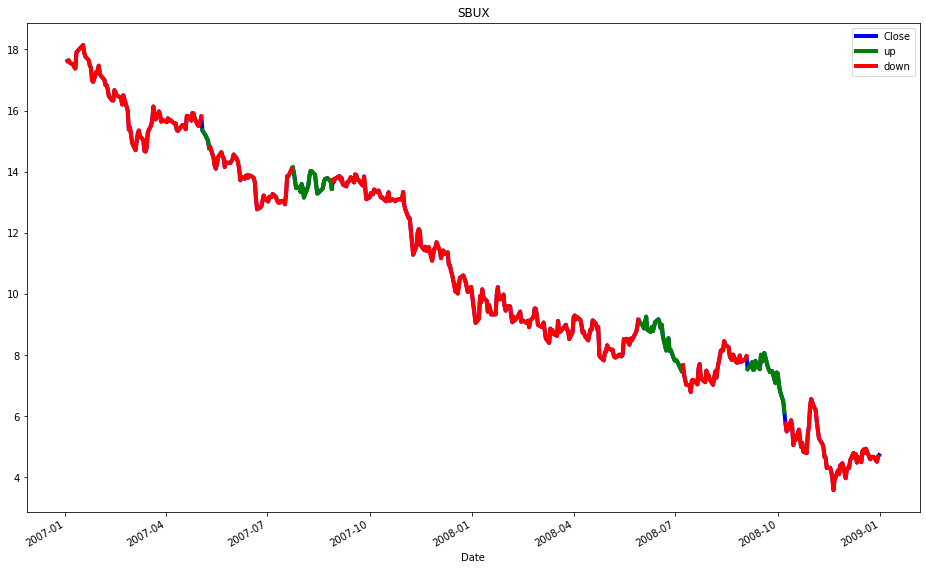

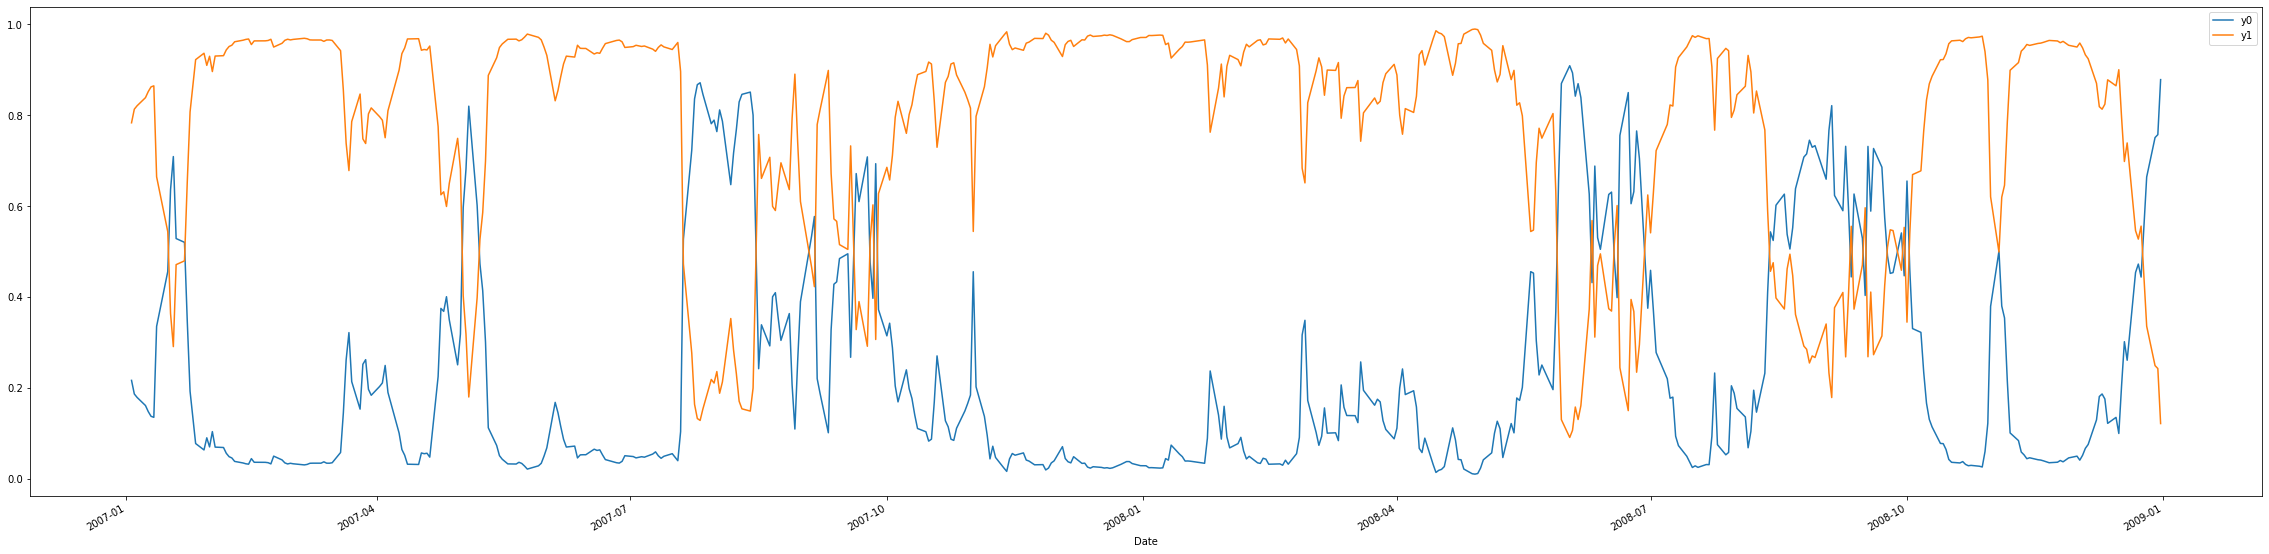

In [15]:
getres = []
allreturn = []
money = 10000
for stock in stocklist[:]:
    st1,st2,st3 = stock[1],1,1
    ed1,ed2,ed3 = stock[2],1,1
    start = datetime.datetime(st1-3,1,1)
    end = datetime.datetime(ed1,ed2,ed3)
    df = web.DataReader(stock[0],'yahoo',start,end)
    df = Indicator().MACD(df,49,57,53)
    df = Indicator().DMI(df,48)
    df = Indicator().RSI(df)
    df = Indicator().WILLIANSR(df)
    df = Indicator().STOCHASTIC(df)
    df['STOCH'] = df['%K']-df['%D']
    df['MACD-SL'] = df['MACD'] - df['SIGNAL LINE']
    df['DMI'] = df['plusDI'] - df['minusDI']
    
    #MACD
    df = norm(df,'MACD')
    df = norm(df,'SIGNAL LINE')
    df = norm(df,'MACD-SL')
    #DMI
    df = norm(df,'plusDI')
    df = norm(df,'minusDI')
    df = norm(df,'DMI')
    #STOCHASTIC
    df = norm(df,'STOCH')
    df = norm(df,'%K')
    df = norm(df,'%D')

    df = norm(df,'RSI')
    df = norm(df,'%R')
 
    x_test = df[['MACD-SL_n','DMI_n','STOCH_n','RSI_n','%R_n']].values
    x_test = add_shift_day(x_test,30)
    y_pred = model.predict(x_test)
    df = df[str(st1)+'-'+str(st2)+'-'+str(st3):]
    y_pred = y_pred[-len(df):]
    print(len(y_pred),len(df))
    df['y0'] = y_pred[:,0]
    df['y1'] = y_pred[:,1]
    df['y_pred'] = PredictThreshold(y_pred)
    
    b  = df.loc[(df['y_pred']==0)&(df['y_pred'].shift()==1)]['Close']
    bd = df.loc[(df['y_pred']==0)&(df['y_pred'].shift()==1)].index
    s  = df.loc[(df['y_pred']==1)&(df['y_pred'].shift()==0)]['Close']
    sd = df.loc[(df['y_pred']==1)&(df['y_pred'].shift()==0)].index
    b,bd,s,sd = b.tolist(),bd.tolist(),s.tolist(),sd.tolist()
    
    if df['y_pred'].iloc[0] == 0:
        b.insert(0,df['Close'].iloc[0])
        bd.insert(0,df.index[0])
    elif df['y_pred'].iloc[0] == 1:
        s.insert(0,df['Close'].iloc[0])
        sd.insert(0,df.index[0])

    if df['y_pred'].iloc[-1] == 0:
        s.append(df['Close'].iloc[-1])
        sd.append(df.index[-1])
    if df['y_pred'].iloc[-1] == 1:
        b.append(df['Close'].iloc[-1])
        bd.append(df.index[-1])
    if bd[0]>sd[0]:
        s.pop(0)
        sd.pop(0)   
    if len(b)>len(s):
        b.pop()
        bd.pop() 

    buysellcount = len(b)
    pf= []
    log_return = []
    pfshort = []
    for i in range(len(b)):
        pf.append(((s[i]-b[i])/(b[i])))
        log_return.append(np.log(s[i]/b[i]))

    #GET All Return (Log return)
    allreturn.append(round((np.exp(sum(log_return))-1)*100,2))

    getres.append([stock[0],[stock[1],stock[2]],round(sum(pf)*money,2),round((np.exp(sum(log_return))-1)*100,2),len(b)])
    
    df['up'] = np.where(df['y_pred']==0,df['Close'],np.nan)
    df['down'] = np.where(df['y_pred']==1,df['Close'],np.nan)
    df[['Close','up','down']].plot(figsize=(16,10),title=stock[0],color=['blue','green','red'],linewidth=4)#.get_figure().savefig('Photo/'+str(stock[0])+'Down.svg')
    df[['y0','y1']].plot(figsize=(40,10))

In [16]:
avg = sum(allreturn)/len(stocklist)
avgy = avg/5
print(avg,avgy)

5.384999999999997 1.0769999999999995
